# Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Cargue de datos

In [2]:
# Leer archivos csv
def leer_archivos (path):
    """
    Lee un archivo csv y retorna un dataframe
    :param path: str: path del archivo csv
    :return: DataFrame: dataframe con los datos del archivo
    """
    df = pd.read_csv(path)
    return df

df_personas = leer_archivos("../data/raw/personas.csv")
df_hogares = leer_archivos("../data/raw/hogares.csv")

# Análisis Descriptivo de lso conjuntos de datos

## Dataframe Hogares `df_hogares`

### Vista General del DataFrame: Dimensiones y diccionario de datos

In [3]:
print('dimensiones dataframe:', df_hogares.shape)
print('Información: ')
print('-'*30)
print(df_hogares.info())
df_hogares.head()

dimensiones dataframe: (277158, 20)
Información: 
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277158 entries, 0 to 277157
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   directorio   277158 non-null  int64  
 1   secuencia_p  277158 non-null  int64  
 2   mes          277158 non-null  int64  
 3   clase        277158 non-null  int64  
 4   dominio      277158 non-null  object 
 5   p5090        277158 non-null  int64  
 6   p5100        10462 non-null   float64
 7   p5130        164923 non-null  float64
 8   nper         277158 non-null  int64  
 9   npersug      277158 non-null  int64  
 10  ingtotug     277158 non-null  float64
 11  ingtotarr    277158 non-null  float64
 12  ingpcug      277158 non-null  float64
 13  li           277158 non-null  float64
 14  lp           277158 non-null  float64
 15  pobre        277158 non-null  int64  
 16  indigente    277158 non-null 

,directorio,secuencia_p,mes,clase,dominio,p5090,p5100,p5130,nper,npersug,ingtotug,ingtotarr,ingpcug,li,lp,pobre,indigente,npobres,nindigentes,fex_c
0,7309060,1,1,1,RESTO URBANO,3,NaN,NaN,3,3,2.200000e+06,2.200000e+06,7.333333e+05,211838.33655,393677.759609,0,0,0,0,131.723106
1,7309061,1,1,1,RESTO URBANO,2,1800000.0,500000.0,2,2,3.130000e+06,3.130000e+06,1.565000e+06,211838.33655,393677.759609,0,0,0,0,83.471732
2,7309062,1,1,1,RESTO URBANO,4,NaN,400000.0,1,1,5.000000e+05,9.000000e+05,9.000000e+05,211838.33655,393677.759609,0,0,0,0,106.360970
3,7309063,1,1,1,RESTO URBANO,4,NaN,250000.0,1,1,5.733333e+05,8.233333e+05,8.233333e+05,211838.33655,393677.759609,0,0,0,0,106.360970
4,7309064,1,1,2,RURAL,3,NaN,NaN,5,5,2.980000e+06,2.980000e+06,5.960000e+05,164635.13660,270748.848811,0,0,0,0,27.049855


El dataframe `df_hogares` contiene información detallada de 277158 hogares en Colombia, con un total de 20 columnas. Cada columna representa una variable específica del estudio de pobreza monetaria y desigualdad. La descripción de las columnas y su tipo de dato se puede consultar en: [Diccionario de datos Dataframe Hogares](https://github.com/kellyninor/ProyectoCare/blob/main/docs/tables/hogares.md).

### Validación de Valores Nulos

In [4]:
def evaluar_nulos(df, columnas):
    """
    Evalúa los valores nulos en las columnas especificadas de un DataFrame.
    
    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    columnas (list): Lista de nombres de columnas a evaluar.
    
    Retorna:
    pd.DataFrame: DataFrame con la cantidad de valores nulos para cada columna especificada.
    """
    # Verificar que las columnas existan en el DataFrame
    columnas_existentes = [col for col in columnas if col in df.columns]
    
    # Crear un DataFrame con los resultados
    nulos = df[columnas_existentes].isnull().sum()
    nulos_df = pd.DataFrame({
        'Columna': nulos.index,
        'Nulos': nulos.values
    }).sort_values(by='Nulos', ascending=False)
    
    return nulos_df

def visualizar_nulos(df):
    """
    Visualiza los valores nulos en un DataFrame utilizando un diagrama de calor.

    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    """
    # Crear una máscara booleana para los valores nulos
    nulos_mascara = df.isnull()
    
    # Crear el diagrama de calor
    plt.figure(figsize=(12, 8))
    sns.heatmap(nulos_mascara, cbar=False, cmap='viridis', yticklabels=False, xticklabels=df.columns)
    
    # Añadir etiquetas y título
    plt.title('Diagrama de Calor de Valores Nulos')
    plt.xlabel('Columnas')
    plt.ylabel('Índices')
    plt.show()

def graficar_histograma(df, column_name):
    # Verifica que la columna existe en el DataFrame
    if column_name in df.columns:
        # Generar gráfico de barras horizontales para variables categóricas
        if pd.api.types.is_categorical_dtype(df[column_name]) or df[column_name].dtype == 'object':
            plt.figure(figsize=(10, 6))
            sns.countplot(y=df[column_name], palette='viridis', order=df[column_name].value_counts().index)
            plt.title(f'Distribución de {column_name}')
            plt.xlabel('Frecuencia')
            plt.ylabel(column_name)
        # Generar histograma para variables numéricas
        else:
            plt.figure(figsize=(10, 6))
            # Usamos un color específico de la paleta viridis
            color_viridis = sns.color_palette('viridis', as_cmap=True)(0.6)  # Selecciona un color de la paleta
            sns.histplot(df[column_name], bins=20, color=color_viridis)
            plt.title(f'Histograma de {column_name}')
            plt.xlabel(column_name)
            plt.ylabel('Frecuencia')

        plt.tight_layout()  # Ajusta el diseño del gráfico
        plt.show()
    else:
        print(f"La columna '{column_name}' no existe en el DataFrame.")

def obtener_frecuencia_valores(df, column_name):
    """
    Esta función recibe un DataFrame y el nombre de una columna, 
    y devuelve la frecuencia de cada valor único en esa columna.

    Parámetros:
    df: DataFrame de pandas
    column_name: str, nombre de la columna

    Retorno:
    Serie de pandas con los valores únicos y sus frecuencias
    """
    # Obtener la frecuencia de los valores únicos
    frecuencia_valores_unicos = df[column_name].value_counts()

    # Retornar las frecuencias
    return frecuencia_valores_unicos

In [5]:
evaluar_nulos(df_hogares, df_hogares.columns)

,Columna,Nulos
6,p5100,266696
7,p5130,112235
0,directorio,0
11,ingtotarr,0
18,nindigentes,0
17,npobres,0
16,indigente,0
15,pobre,0
14,lp,0
13,li,0


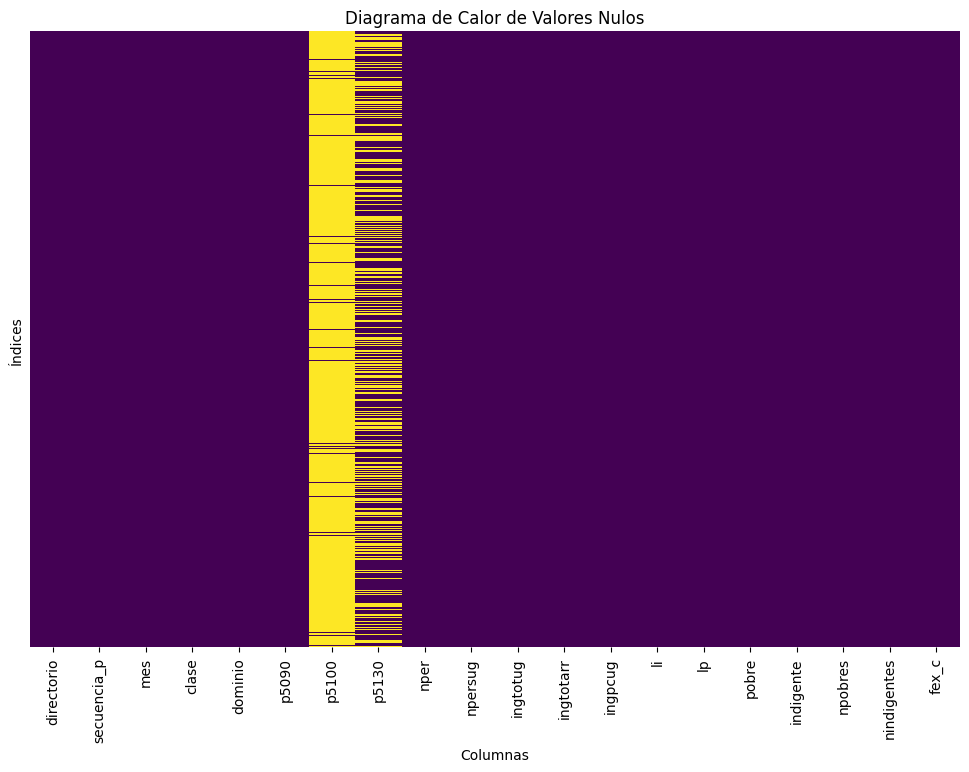

In [6]:
visualizar_nulos(df_hogares)

* **`p5100`:** La columna tiene un número significativo de valores nulos (266,696). Esto sugiere que una gran proporción de encuestados no pudo proporcionar un valor específico para la cuota de amortización. La cantidad de 99 indica una falta de información.
* **`p5130`:** Esta columna también muestra un número considerable de valores nulos (112,235). En estos casos no es posible obtener el valor estimado de arriendo, lo que puede reflejar limitaciones en la estimación o en la disponibilidad de datos.
* Las columnas restantes del dataframe no presentan valores nulos: `directorio`, `ingtotarr`, `nindigentes`, `npobres`, `indigente`, `pobre`, `lp`, `li`, `ingpcug`, `ingtotug`, `secuencia_p`, `npersug`, `nper`, `p5090`, `dominio`, `clase`, `mes`, y `fex_c`

### Conversión de las variables categóricas

Para mejorar el análisis del DataFrame `df_hogares`, es necesario convertir ciertas variables a tipo categórico. Variables como `clase`, `dominio`, `mes`, `p5090`, `pobre` e `indigente` se convierten a categóricas para facilitar la segmentación y comparación de datos en distintas categorías y períodos, así como para permitir una interpretación más precisa de las condiciones habitacionales y de pobreza. Esta conversión optimiza el análisis de los datos, permitiendo aplicar técnicas estadísticas y de machine learning adecuadas para variables categóricas y mejorando la claridad en la identificación de patrones y tendencias.

* **`clase`:** Representa el tipo de área (1: cabecera, 2: resto). Esta variable debe ser categorizada para distinguir claramente entre las áreas urbanas y rurales, permitiendo una segmentación más precisa en el análisis geográfico y social.
* **`dominio`:** Denota la región o dominio geográfico. Convertir esta variable a categórica permite identificar y comparar distintos dominios de manera efectiva, facilitando el análisis regional.
* **`mes`:** Indica el mes de la encuesta. Como esta variable representa períodos específicos, convertirla a categórica ayuda a agrupar los datos por mes y analizar las tendencias temporales sin interpretar los meses como valores numéricos continuos.
* **`p5090`:** Describe el tipo de ocupación de la vivienda (1: Propia, 2: Propia en pago, 3: En arriendo, etc.). Esta variable se convierte a categórica para clasificar las viviendas en distintas categorías de ocupación, lo cual es crucial para entender las condiciones habitacionales y sus impactos en el análisis de pobreza y bienestar.
* **`pobre`** y **`indigente`:** Estas variables indican si un hogar está en condiciones de pobreza o pobreza extrema (1: sí, 0: no). La conversión a categórica permite una evaluación directa de los hogares en función de su estatus de pobreza, facilitando la segmentación y el análisis de políticas de intervención.

In [7]:
def convert_to_categorical(df, columns):
    """
    Convierte las columnas especificadas de un DataFrame a tipo categórico.

    Parámetros:
    df (pd.DataFrame): El DataFrame en el que se realizarán las conversiones.
    columns (list): Lista de nombres de columnas a convertir a tipo categórico.

    Retorna:
    pd.DataFrame: El DataFrame con las columnas especificadas convertidas a tipo categórico.
    """
    for column in columns:
        if column in df.columns:
            df[column] = pd.Categorical(df[column])
        else:
            print(f"Columna '{column}' no encontrada en el DataFrame.")
    return df

categorical_columns = ['clase', 'mes', 'dominio', 'p5090', 'pobre', 'indigente']
df_hogares = convert_to_categorical(df_hogares, categorical_columns)

### Identificación de registros pertenecientes a cada hogar

En el análisis del DataFrame `df_hogares`, se ha confirmado que la combinación de las columnas `directorio` y `secuencia_p` identifica de manera única a cada hogar en el conjunto de datos. Según el diccionario de datos, la columna `directorio` actúa como un identificador único del hogar, mientras que `secuencia_p` proporciona una secuencia de identificación adicional dentro del hogar. Para validar esta unicidad, se verificó que no existen registros duplicados en la combinación de estas dos columnas. El análisis reveló que cada combinación de `directorio` y `secuencia_p` es única en el DataFrame, lo que asegura que cada hogar está representado una sola vez y que no hay datos repetidos o inconsistencias en la identificación de los hogares. Esta confirmación es crucial para asegurar la integridad de los datos y para garantizar que cualquier análisis posterior sobre los hogares y sus características se realice sobre una base sólida y consistente.

In [8]:
# Verificar la combinación única de directorio y secuencia_p como llave compuesta para identificar un unico hogar en el dataframe `df_personas``
# Primero, verificamos que no hay duplicados en la combinación de las dos columnas
duplicados = df_hogares.duplicated(subset=['directorio', 'secuencia_p'], keep=False)

# Mostrar el número de registros duplicados (si existe alguno)
num_duplicados = duplicados.sum()

# Crear un DataFrame que muestra duplicados si existen
df_duplicados = df_hogares[duplicados]

# Verificar la combinación única de directorio y secuencia_p
# Contar el número de hogares únicos según la combinación
num_hogares_unicos = df_hogares[['directorio', 'secuencia_p']].drop_duplicates().shape[0]

# Contar el total de registros en el DataFrame
num_registros_totales = df_hogares.shape[0]

print(f'Número total de registros: {num_registros_totales}')
print(f'Número de hogares únicos (combinación de directorio y secuencia_p): {num_hogares_unicos}')
print(f'Número de registros duplicados en la combinación directorio y secuencia_p: {num_duplicados}')

if num_duplicados > 0:
    print('Ejemplos de registros duplicados:')
    print(df_duplicados.head())

# Validar si la combinación de directorio y secuencia_p es única para cada hogar
if num_hogares_unicos == num_registros_totales:
    print('La combinación de directorio y secuencia_p identifica de manera única cada hogar en el dataframe df_hogares.')
else:
    print('Existen duplicados en la combinación de directorio y secuencia_p, lo cual indica que no todos los hogares están identificados de manera única.')

Número total de registros: 277158
Número de hogares únicos (combinación de directorio y secuencia_p): 277158
Número de registros duplicados en la combinación directorio y secuencia_p: 0
La combinación de directorio y secuencia_p identifica de manera única cada hogar en el dataframe df_hogares.


### Estadísticas descriptivas

In [9]:
print("Estadísticas descriptivas variables categóricas:")
df_hogares.select_dtypes(include=['object', 'category']).describe()

Estadísticas descriptivas variables categóricas:


,mes,clase,dominio,p5090,pobre,indigente
count,277158,277158,277158,277158,277158,277158
unique,12,2,25,7,2,2
top,2,1,RESTO URBANO,3,0,0
freq,23565,239714,44343,112235,196434,249533


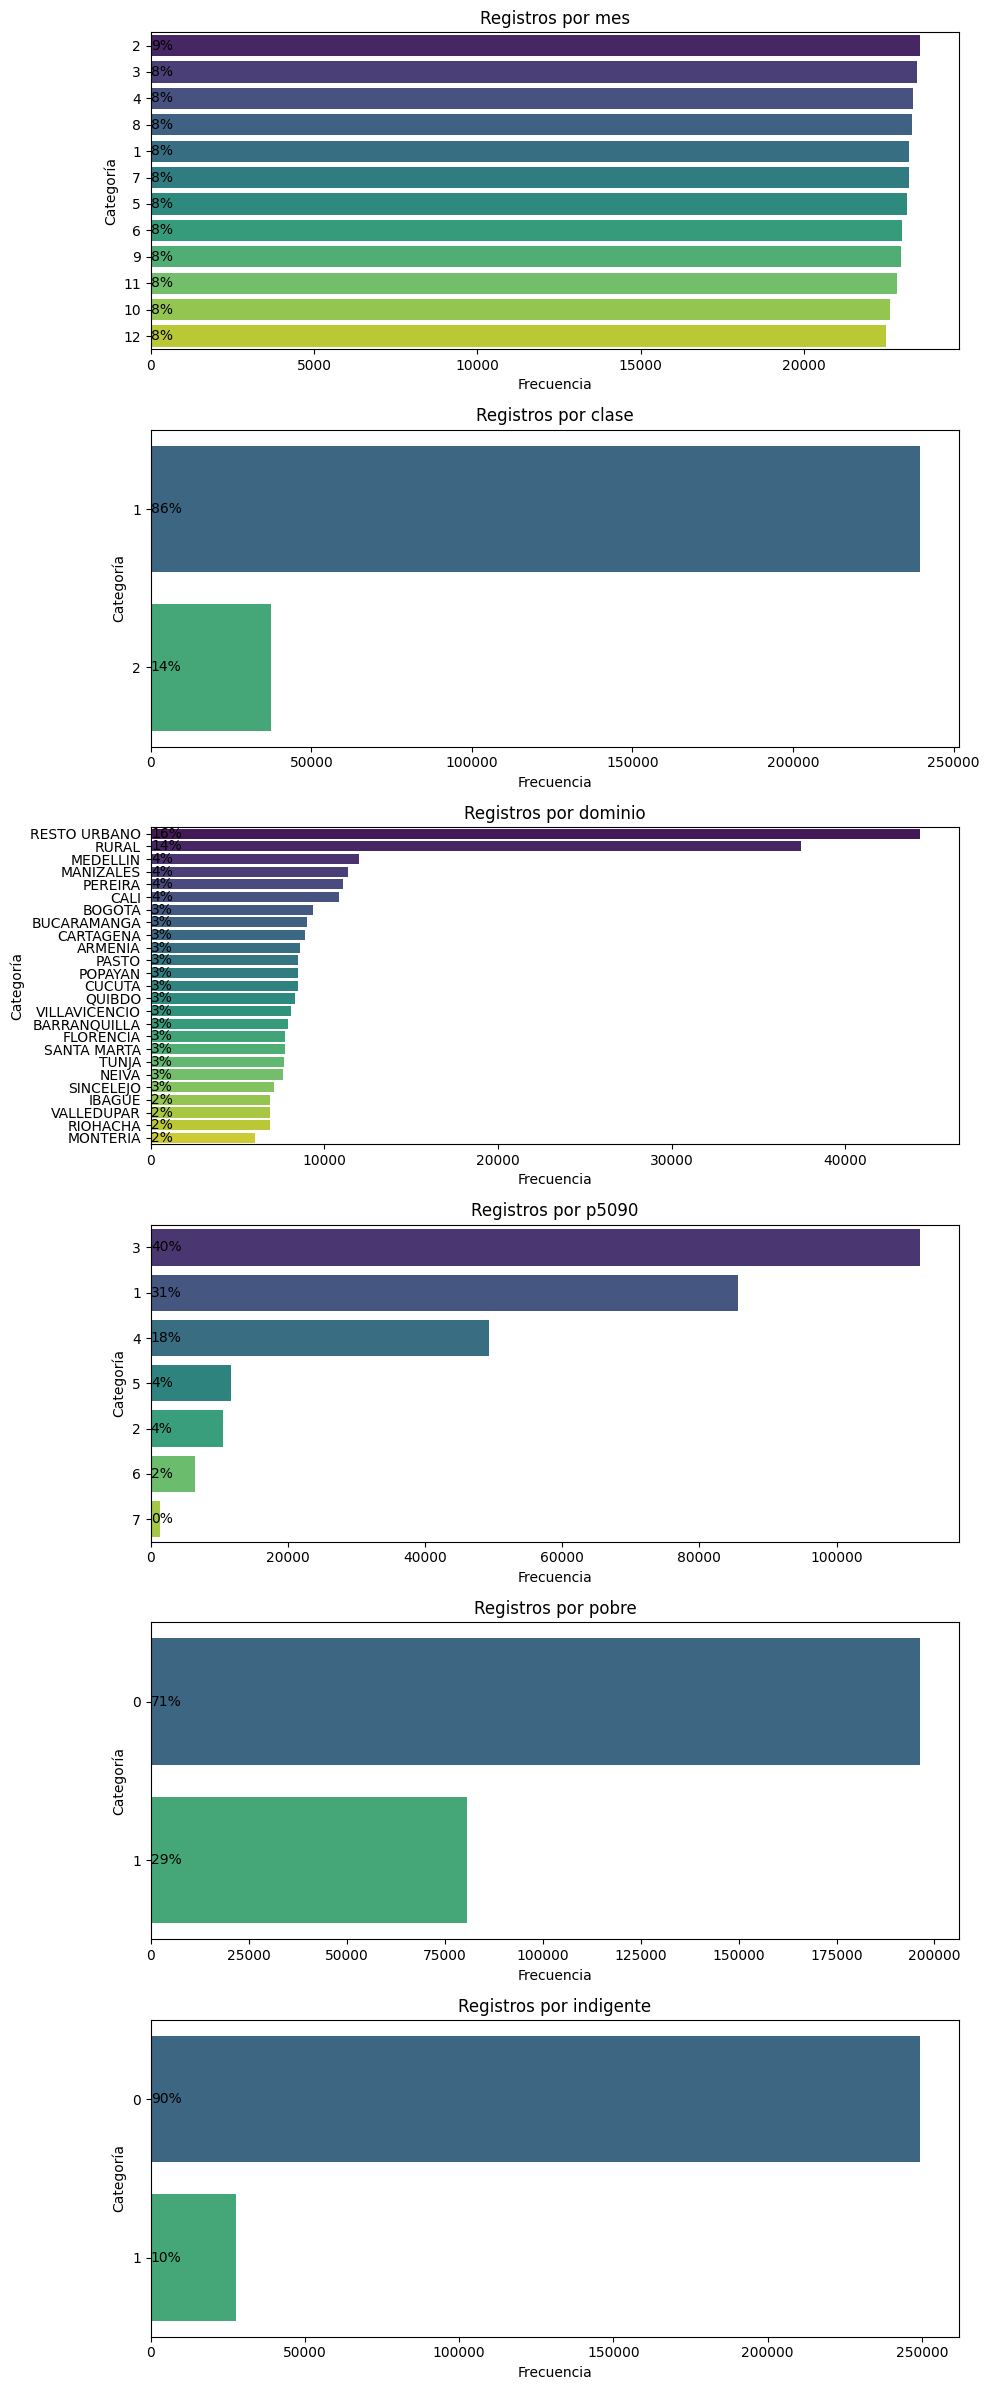

In [10]:
# Crear una figura con subplots
fig, axs = plt.subplots(len(df_hogares.select_dtypes(include=['object', 'category']).columns), 1, figsize=(10, len(df_hogares.select_dtypes(include=['object', 'category']).columns) * 4))

# Graficar la participación de cada categoría en cada variable
for i, col in enumerate(df_hogares.select_dtypes(include=['object', 'category']).columns):
    sns.countplot(y=col, data=df_hogares, ax=axs[i], order=df_hogares[col].value_counts().index, palette='viridis')
    axs[i].set_title(f'Registros por {col}')
    axs[i].set_ylabel('Categoría')
    axs[i].set_xlabel('Frecuencia')

    # Añadir el porcentaje de participación en cada categoría
    for j, value in enumerate(df_hogares[col].value_counts(normalize=True) * 100):
        axs[i].text(value + 1, j, f'{value:.0f}%', va='center')

plt.tight_layout()
plt.show()

Los hogares analizados contienen las siguientes características en las variables categóricas:

- Las encuestas fueron realizadas en los 12 meses del año 2023, con una participación similar cada mes.
- El 86% de las encuestas se aplicaron en tipo de área de cabecera (clase), que corresponde al lugar en donde se ubica la sede administrativa de un municipio.
- Las áreas principales donde se aplicaron fueron resto urbano (16%), rural (14%), y ciudades principales como Medellín, Manizales, Pereira, Cali y Bogotá.
- El 40% de los hogares viven en arriendo, 31% tiene hogar propio totalmente pagada, 18% viven en usufructo y un 4% posee una casa, pero sin título.
- El 71% de los hogares no viven en condición de pobreza e indigencia.

In [11]:
print("Estadísticas descriptivas variables númericas:")
df_hogares.select_dtypes(include=['number']).iloc[:,2:].describe()

Estadísticas descriptivas variables númericas:


,p5100,p5130,nper,npersug,ingtotug,ingtotarr,ingpcug,li,lp,npobres,nindigentes,fex_c
count,1.046200e+04,1.649230e+05,277158.000000,277158.000000,2.771580e+05,2.771580e+05,2.771580e+05,277158.000000,277158.000000,277158.000000,277158.000000,277158.000000
mean,1.460966e+06,7.492153e+05,2.939352,2.932450,2.615761e+06,2.877029e+06,1.213553e+06,224362.956267,456415.269634,1.049156,0.355425,62.335956
std,1.428714e+07,7.286789e+06,1.589025,1.587732,3.534169e+06,3.669770e+06,1.798742e+06,31770.368696,93276.401431,1.893907,1.223411,87.747577
min,9.800000e+01,9.800000e+01,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,164635.136600,270748.848811,0.000000,0.000000,0.839358
25%,3.700000e+05,2.500000e+05,2.000000,2.000000,9.000000e+05,1.053333e+06,3.866667e+05,211838.336550,403708.550247,0.000000,0.000000,13.322155
50%,6.275000e+05,4.200000e+05,3.000000,3.000000,1.641667e+06,1.855000e+06,7.166667e+05,220377.673032,464675.365699,0.000000,0.000000,26.502666
75%,1.200000e+06,7.000000e+05,4.000000,4.000000,3.065988e+06,3.388933e+06,1.375000e+06,245281.468916,531141.128130,2.000000,0.000000,74.784106
max,6.700000e+08,9.000000e+08,28.000000,28.000000,2.369808e+08,2.399808e+08,1.199904e+08,290186.989204,608937.375082,28.000000,28.000000,1238.270713


Los hogares analizados contienen las siguientes características en las variables categóricas:

- La cota de amortización `p5090` depende del tipo de ocupación del hogar (`p5100`) cuando se se selecciona la opción 2 (Propia, la están pagando. Esta variable presenta una alta variabilidad dado que el valor mínimo es 370.000 y el máximo es 670 millones.
- En la variable si tuvieran que pagar arriendo los hogares que no lo hacen (`p5130` que proviene de `p5090` categorías 1,2,4,5,6), es una variable que también presenta una alta variabilidad. En promedio pagarían 749.215 con una desviación de 7286789.
- El número total de personas en el hogar `nper` y el número de personas en la unidad de gasto `npersug` tiene las mismas estadísticas descriptivas: Con un promedio de 3 personas en el hogar y una desviación de 1.5. Alrededor del 75% de los hogares tienen 4 personas, son atípicos los hogares que tienen 28 personas.
- El ingreso total de la unidad de gasto antes de imputación de arriendos a propietarios y usufructuarios `ingtotug` promedio es 2.615.760, presenta una alta variabilidad. El 50% de los hogares tienen un ingreso de 1.641.666 mientras que el 75% un ingreso de 3.065.988.
- El ingreso total de la unidad de gasto con imputación de arriendos a propietarios y usufructuarios `ingtotarr` promedio es 2.877.029, presenta una alta variabilidad. El 50% de los hogares tienen un ingreso de 1.855.000 mientras que el 75% un ingreso de 3.388.933.
- El ingreso percápita `ingpcug`, ingreso total dividido por el número de integrantes del hogar en promedio es 1.213.553 con una desviación alta. El 50% tiene un ingreso de 716.666 pero un 75% 1.375.000.
- La línea de indigencia `li`, valor de la canasta básica de alimentos por la cual un hogar es considerado en pobreza extrema en promedio es 224.362 con una desviación de 31.770.
- La línea de pobreza `lp`, valor e la canasta de bienes por la cual un hogar es considerado en pobreza en promedio es 456.415 con una desviación de 93.276.
- El número de personas en hogares considerados pobres `npobres` en promedio es 1 persona con una desviación de 2 personas.
- El número de personas en hogares considerados en pobreza extrema `nindigentes` en promedio es 0 personas.
- El factor de expansión anualizado `fex_c`, que corresponde al peso o representación de la muestra en el universo investigado, en promedio es 62.3.

Dado que `nper` y `npersug` tiene las mismas estadísticas descriptivas, se crea el método `validate_columns` para corroborar si las información en las columnas esta duplicada. 

In [12]:
# Corroborar si dos columnas tienen la misma información
def validate_column_duplication(df, col1, col2):
    """
    Valida si dos columnas en un DataFrame contienen la misma información, 
    es decir, si son duplicadas exactas una de la otra.

    Parámetros:
    df (pd.DataFrame): El DataFrame que contiene las columnas.
    col1 (str): El nombre de la primera columna.
    col2 (str): El nombre de la segunda columna.
    """
    # Verificar si los valores en las dos columnas son idénticos en todos los registros
    if df[col1].equals(df[col2]):
        print(f"Las columnas '{col1}' y '{col2}' son duplicadas y contienen la misma información en todos los registros.")
    else:
        print(f"Las columnas '{col1}' y '{col2}' no contienen la misma información en todos los registros.")

# Ejemplo de uso:
validate_column_duplication(df_hogares, 'nper', 'npersug')

Las columnas 'nper' y 'npersug' no contienen la misma información en todos los registros.


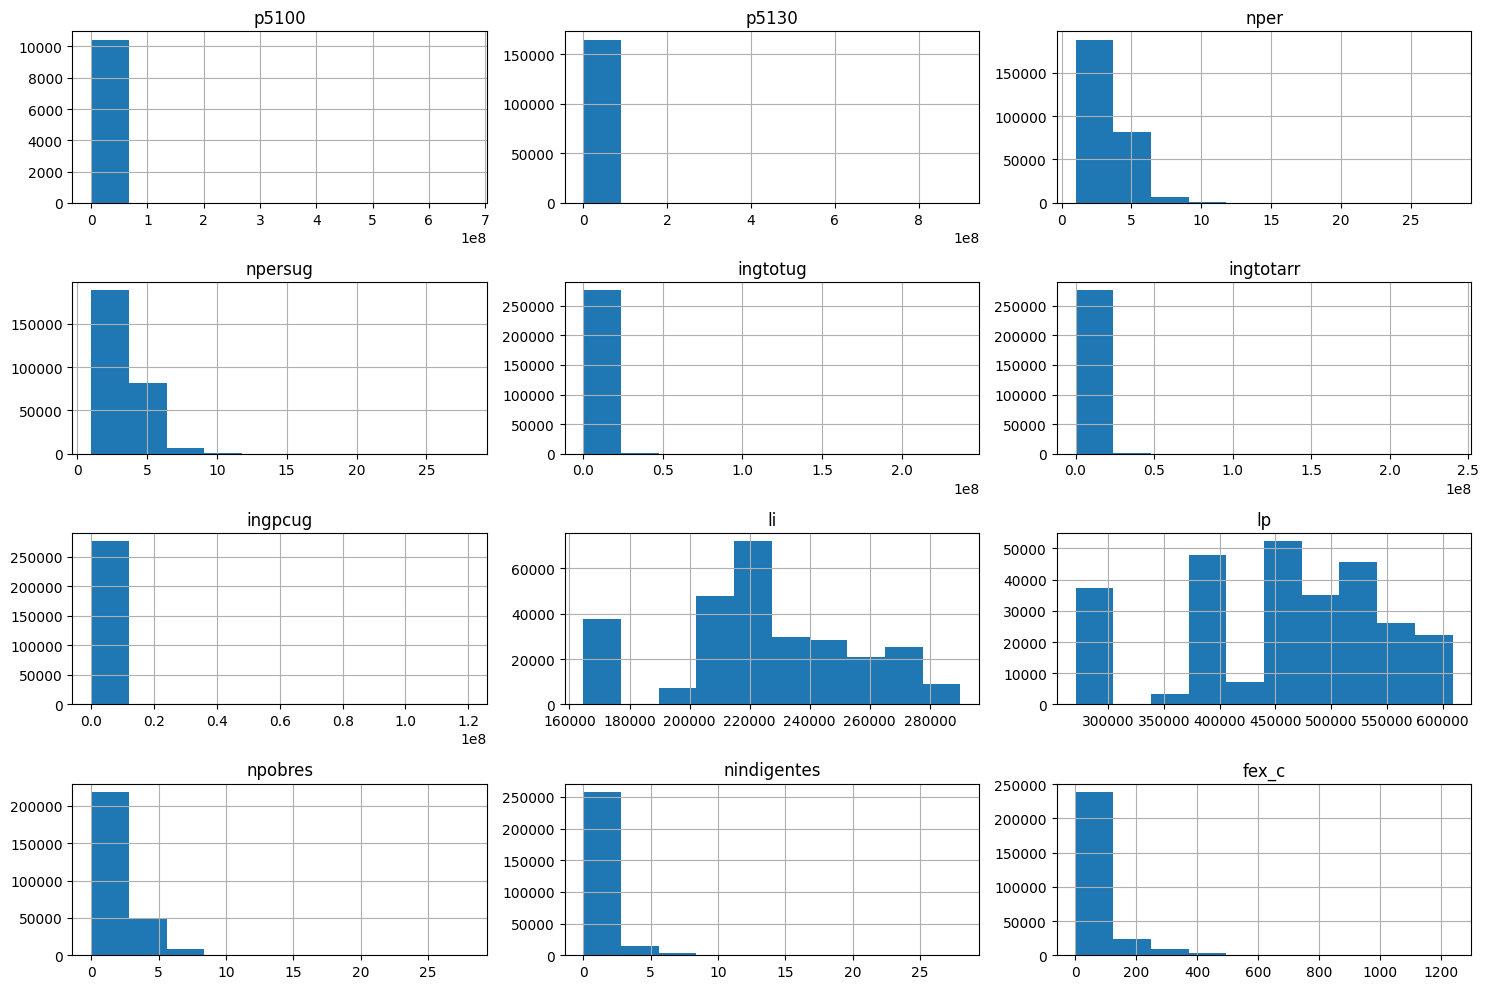

In [13]:
# Histograma variables númericas
df_hogares.select_dtypes(include=['number']).iloc[:,2:].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

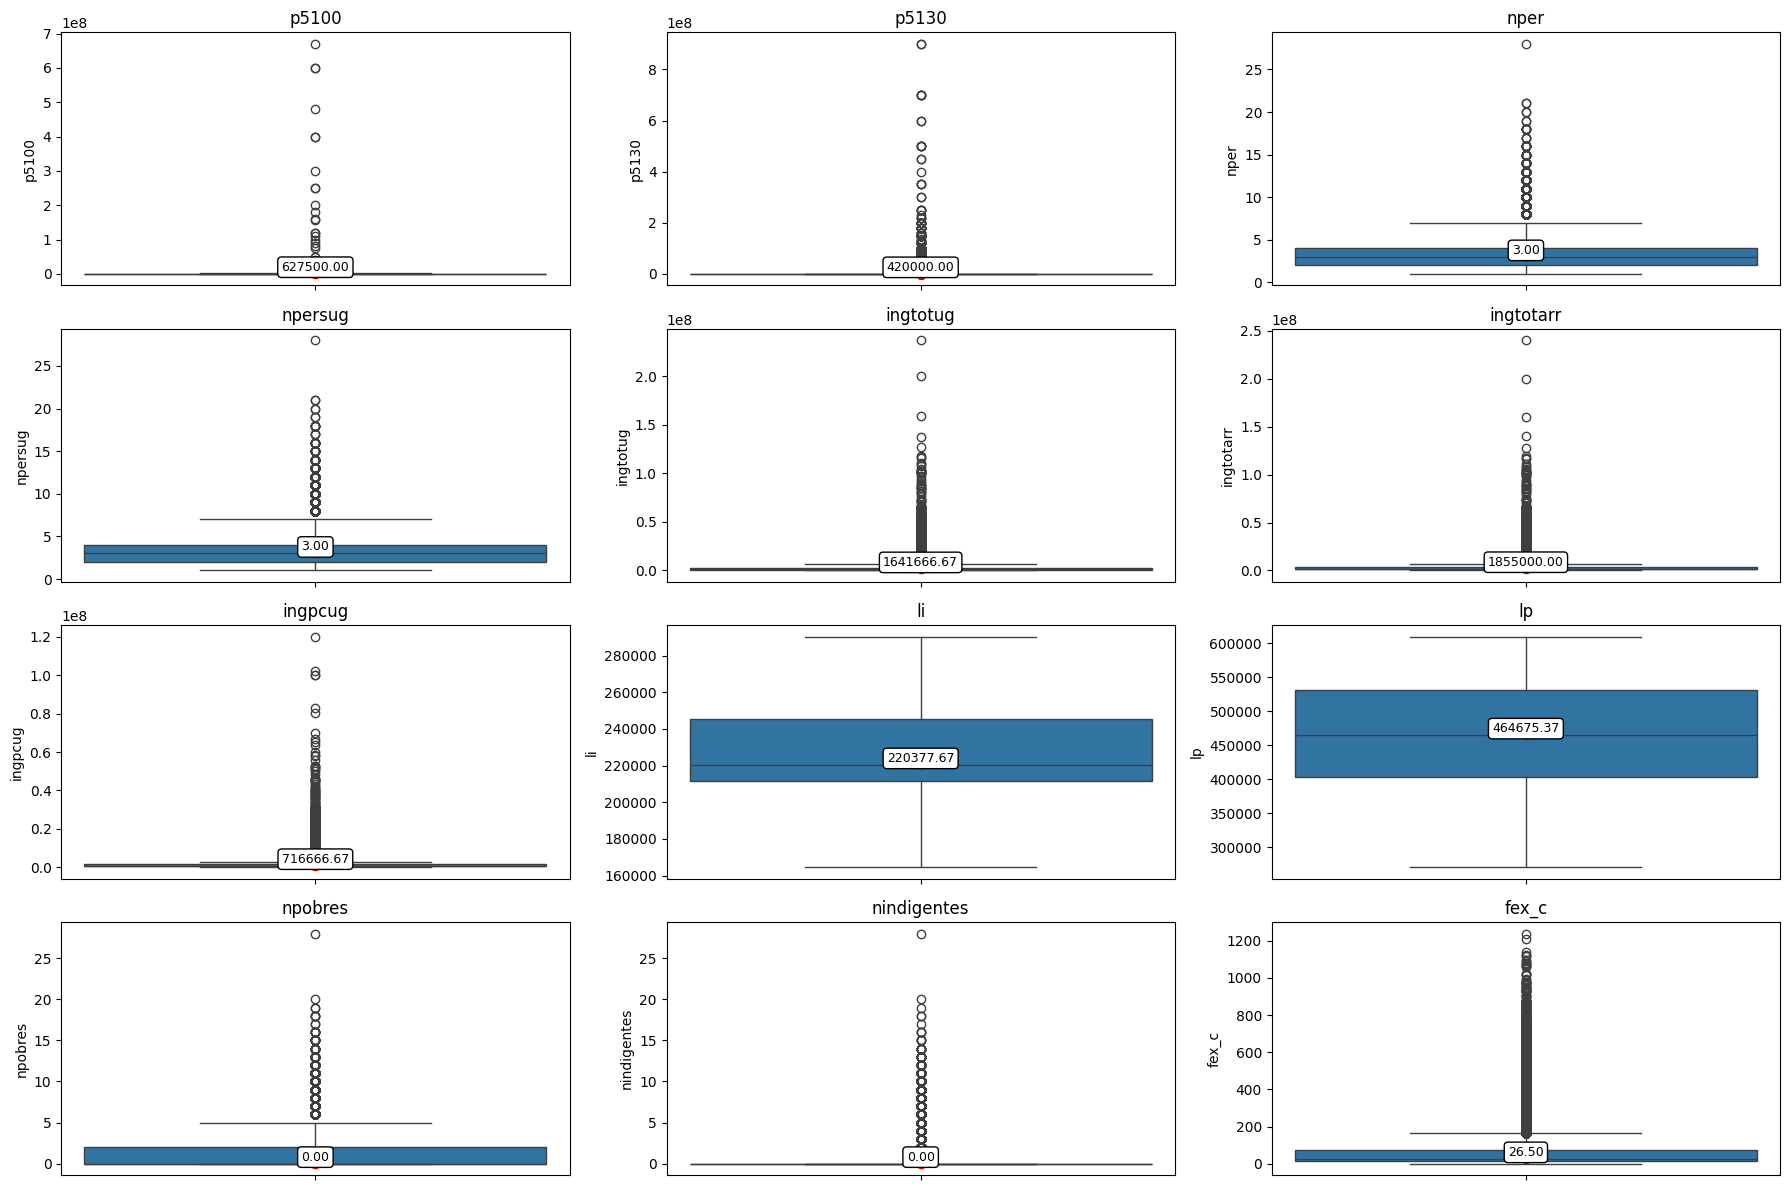

In [14]:
# Boxplots para ver la distribución de los datos
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(df_hogares.select_dtypes(include=['number']).iloc[:,2:].columns):
    sns.boxplot(y=df_hogares[column], ax=axes[i])

    # Mediana (Q2)
    Q2 = np.percentile(df_hogares[column].dropna(), 50)
    axes[i].plot(0, Q2, 'o', color='red')
    axes[i].text(0, Q2, f'{Q2:.2f}', ha='center', va='bottom', color='black', fontsize=9,
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Títulos
    axes[i].set_title(column)

# Mostrar figura
plt.tight_layout()
plt.show()

*Simétria vs asimétria:* Las variables que muestran una distribución aproximadamente simétrica es `li`y `lp`, las demás variables presentan una distribución asimétrica, con una cola más larga hacia la izquierda.
En las variables donde más se presentan valores extremos en un lado de la distribucción es `p5100`y `p5130`.

*Modalidad:* La mayoría de los histogramas parecen unimodales, es decir, tienen un pico principal, excepto para la variable `lp`.

### Generación del nuevo dataframe de datos para el modelado `df_pobreza_desigualdad`

Para una mayor legibilidad y mejor manejo de los datos, se ha creado un nuevo DataFrame llamado `df_pobreza_desigualdad`, que contiene datos limpios de los dos conjuntos de datos (`df_hogares` y `df_personas`) de la encuesta medición de pobreza monetaria y desigualdad. Este nuevo conjunto de datos excluye las columnas `p5100` y `p5130` debido a la gran cantidad de valores nulos; la variable `p5090` ya proporciona una descripción clara sobre la situación de la vivienda (si es propia, en arriendo, en usufructo, etc.) sin tener valores nulos. Esto hace que la columna `p5090` sea suficiente para caracterizar la tenencia de la vivienda sin necesidad de los valores de las cuotas o estimaciones de arriendo de las columnas `p5100` y `p5130`.

### Variable `p5090`: Tenencia de la vivienda.

Corresponde al tipo de tenencia de vivienda: 
1. Propia, totalmente pagada, 
2. Propia, la están pagando, 
3. En arriendo o subarriendo, 
4. En usufructo, 
5. Posesión sin título (ocupante), 
6. Otra.

In [15]:
obtener_frecuencia_valores(df_hogares, 'p5090')

p5090
3    112235
1     85668
4     49338
5     11718
2     10462
6      6460
7      1277
Name: count, dtype: int64

Dado que algunos registros de la columna `p5090` tiene valor 7 sugiriendo inconsistencia en los datos, por lo que se opta por reemplazar su valor erróneo por uno valido, en este caso 6. La variable esta en forma númerica, se hará el reemplazo por el correspondiente valor categórico.

In [16]:
# Reemplazar el valor "7" por otro valor, como "6" 
df_hogares['p5090'].replace(7, 6, inplace=True)

# Diccionario para mapear los números a sus categorías de texto
tenencia_dict = {
    1: 'Propia, totalmente pagada',
    2: 'Propia, la están pagando',
    3: 'En arriendo o subarriendo',
    4: 'En usufructo',
    5: 'Posesión sin título (ocupante)',
    6: 'Otra'
}

# Reemplazar los valores numéricos en la columna 'tenencia_viv' por sus equivalentes textuales
df_hogares['p5090'] = df_hogares['p5090'].replace(tenencia_dict)

p5090
En arriendo o subarriendo         112235
Propia, totalmente pagada          85668
En usufructo                       49338
Posesión sin título (ocupante)     11718
Propia, la están pagando           10462
Otra                                7737
Name: count, dtype: int64


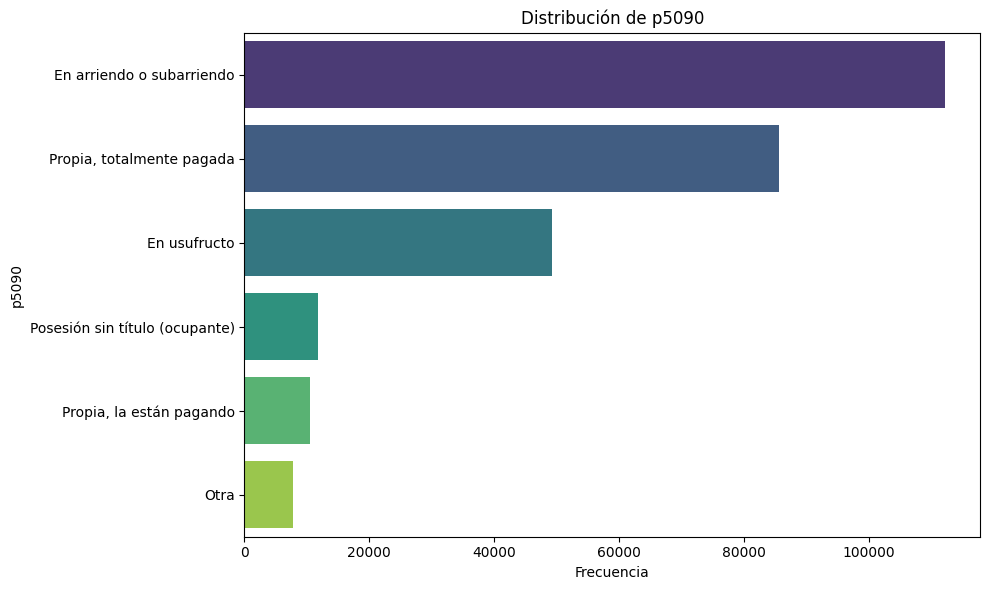

In [17]:
print(obtener_frecuencia_valores(df_hogares, 'p5090'))
graficar_histograma(df_hogares, 'p5090')

### Variable `Dominio`

Corresponde a la región o dominio geográfico

dominio
RESTO URBANO     44343
RURAL            37444
MEDELLIN         11994
MANIZALES        11379
PEREIRA          11083
CALI             10841
BOGOTA            9322
BUCARAMANGA       9016
CARTAGENA         8911
ARMENIA           8609
PASTO             8510
POPAYAN           8502
CUCUTA            8453
QUIBDO            8298
VILLAVICENCIO     8094
BARRANQUILLA      7931
FLORENCIA         7761
SANTA MARTA       7723
TUNJA             7666
NEIVA             7598
SINCELEJO         7123
IBAGUE            6867
VALLEDUPAR        6853
RIOHACHA          6846
MONTERIA          5991
Name: count, dtype: int64


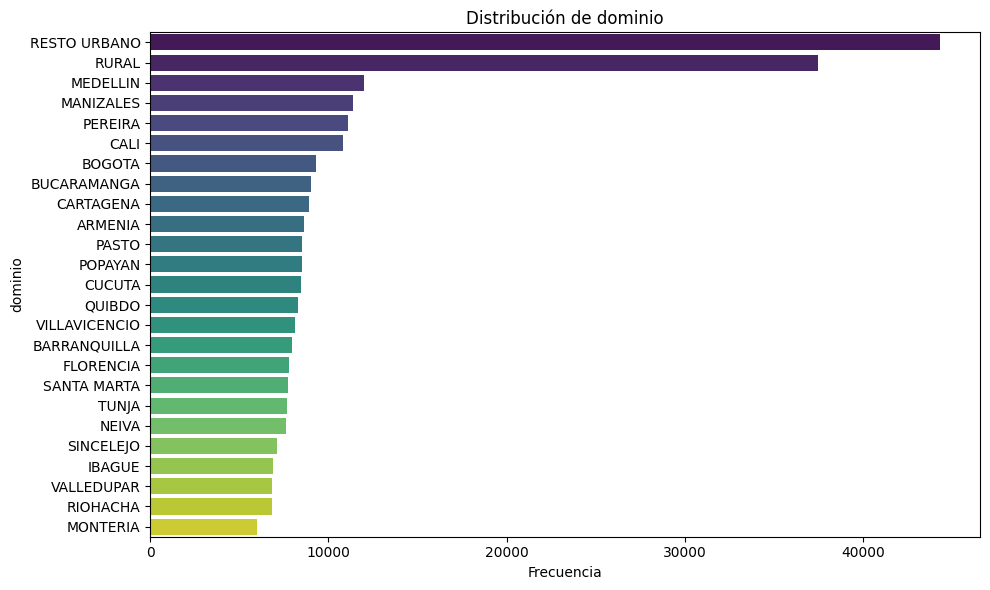

In [18]:
print(obtener_frecuencia_valores(df_hogares, 'dominio'))
graficar_histograma(df_hogares, 'dominio')

### Variable `clase`

Corresponde al tipo de área: 
1. cabecera, 
2. resto (centros poblados y área rural dispersa).

La variable esta en forma númerica, se hará el reemplazo por el correspondiente valor categórico.

clase
cabecera    239714
resto        37444
Name: count, dtype: int64


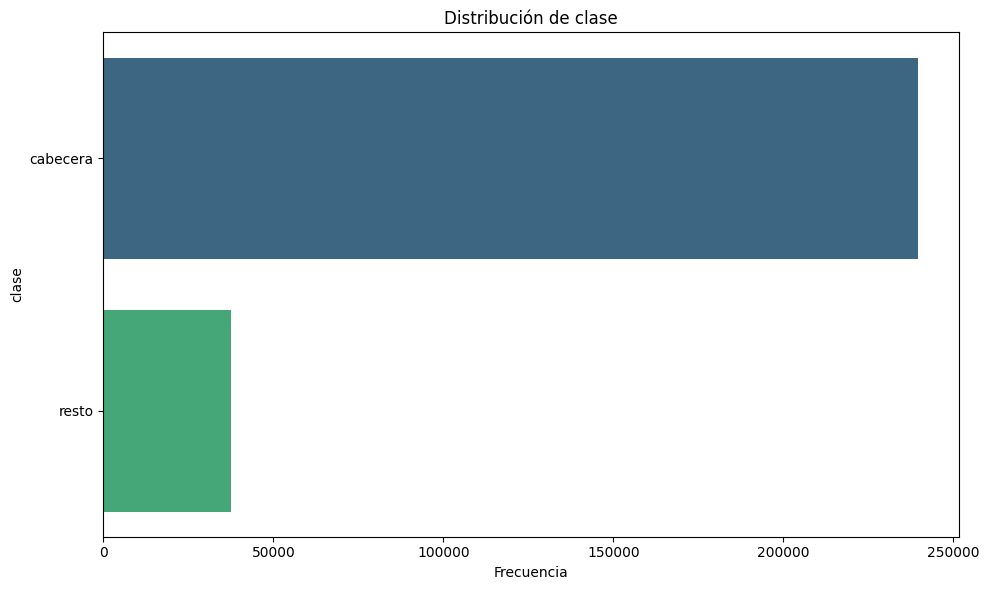

In [19]:
df_hogares['clase'] = df_hogares['clase'].replace({1: 'cabecera', 2: 'resto'})
print(obtener_frecuencia_valores(df_hogares, 'clase'))
graficar_histograma(df_hogares, 'clase')

### Variable `li`: Línea de indigencia

Corresponde al Valor de la canasta básica de alimentos que establece el límite de ingresos por debajo del cual un hogar es considerado en pobreza extrema.


li
211838.336550    22470
214913.026778    21873
164635.136600    18730
168713.856683    18714
222680.748904     6000
226231.786834     5994
209928.856309     5711
212094.546018     5668
236216.607995     5646
227996.366234     5547
239411.753827     5437
230935.860844     5294
276449.548637     4668
270576.604579     4654
286044.759657     4555
218390.511849     4541
290186.989204     4461
223808.458796     4370
244328.839203     4349
215225.473909     4337
273665.248046     4282
252941.441887     4282
251197.753450     4260
246717.470894     4228
276164.102506     4220
258812.014155     4212
219621.044343     4116
262568.495553     4086
259088.857961     4051
255816.893334     4043
229701.477140     4004
220272.464506     3940
233261.239840     3927
240602.139902     3896
268281.546824     3857
240069.377683     3837
245281.468916     3827
217632.843013     3821
276473.082130     3809
246815.543131     3761
194026.553909     3587
196537.569532     3536
222695.078611     3484
207125.9

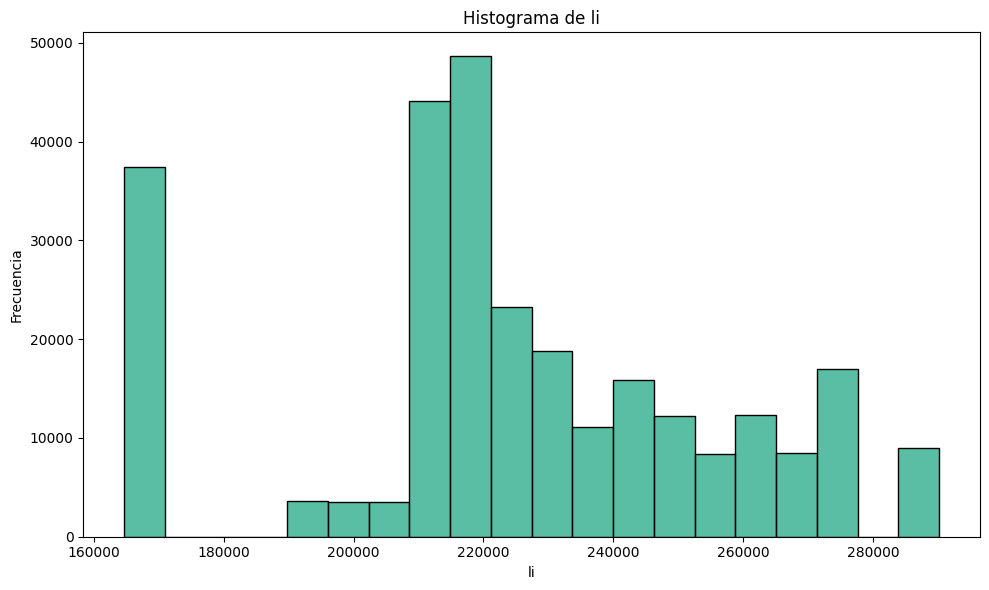

In [20]:
print(obtener_frecuencia_valores(df_hogares, 'li'))
graficar_histograma(df_hogares, 'li')

### Variable `lp`Linea de Pobreza

Corresponde al vaalor de la canasta básica de bienes que establece el límite de ingresos por debajo del cual un hogar es considerado en pobreza.

lp
393677.759609    22470
403708.550247    21873
270748.848811    18730
277561.686341    18714
534241.123894     6000
547580.670743     5994
491560.642353     5711
505514.083705     5668
524273.634392     5646
461775.151628     5547
535221.715944     5437
472902.222618     5294
601231.036387     4668
583470.812007     4654
590753.814157     4555
464675.365699     4541
608937.375082     4461
482963.952768     4370
526188.155147     4349
444103.144479     4337
556923.180809     4282
535523.564149     4282
540601.925441     4260
518612.103015     4228
569918.805735     4220
529612.721757     4212
460909.314882     4116
543107.094252     4086
486795.964185     4051
478900.274122     4043
445678.973022     4004
491316.066550     3940
457715.319484     3927
455316.505296     3896
567922.801712     3857
531141.128130     3837
473581.222218     3827
476971.680711     3821
582923.735446     3809
547619.282650     3761
422793.776494     3587
436891.908371     3536
493855.954442     3484
371247.8

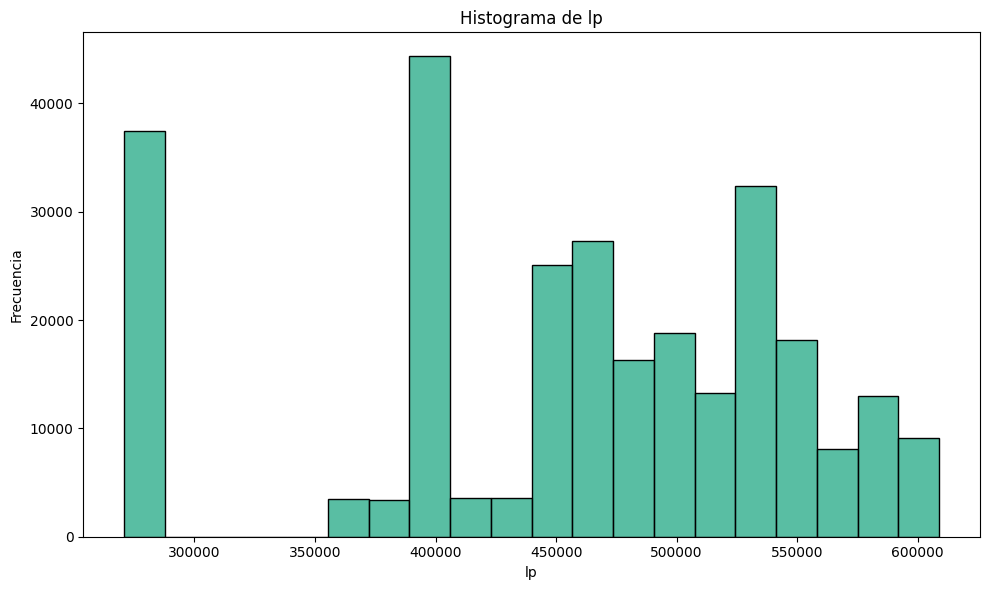

In [21]:
print(obtener_frecuencia_valores(df_hogares, 'lp'))
graficar_histograma(df_hogares, 'lp')

### Variable `pobre`

Variable que identifica los hogares en condiciones de pobreza. 
1. sí
0. no

pobre
no    196434
si     80724
Name: count, dtype: int64


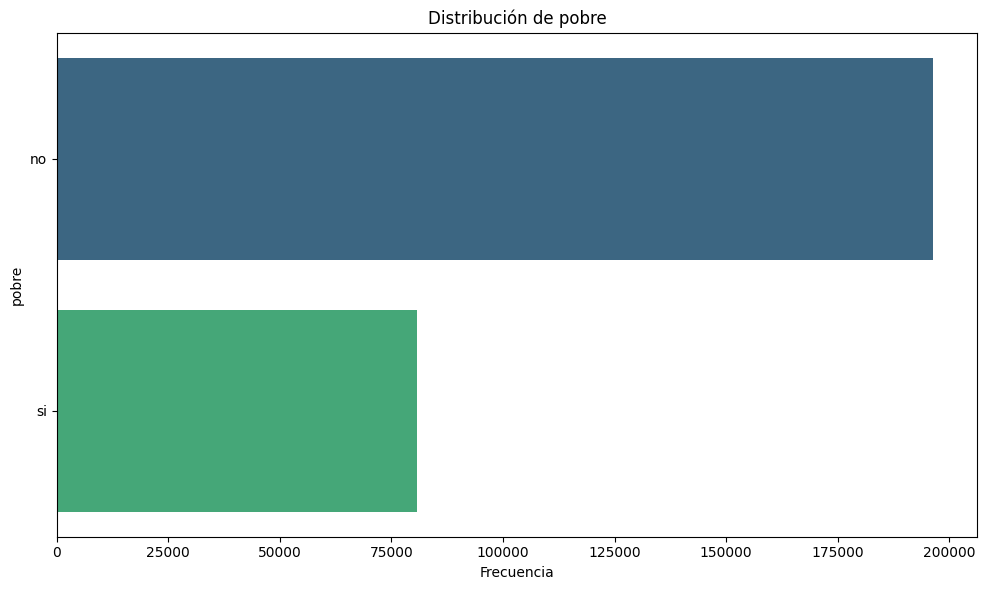

In [22]:
df_hogares['pobre'] = df_hogares['pobre'].replace({1: 'si', 0: 'no'})
print(obtener_frecuencia_valores(df_hogares, 'pobre'))
graficar_histograma(df_hogares, 'pobre')

### Variable `indigente`

Variable que identifica los hogares en condiciones de pobreza extrema
1. sí
0. no

indigente
no    249533
si     27625
Name: count, dtype: int64


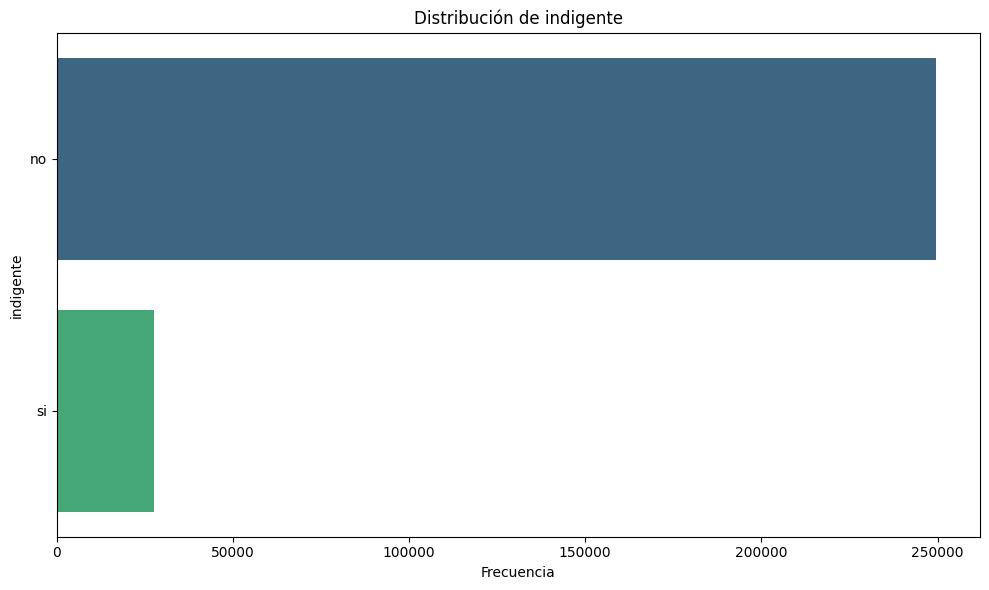

In [23]:
df_hogares['indigente'] = df_hogares['indigente'].replace({1: 'si', 0: 'no'})
print(obtener_frecuencia_valores(df_hogares, 'indigente'))
graficar_histograma(df_hogares, 'indigente')

### Variables `npobres`

Número de personas en hogares clasificados como pobres.

npobres
0     196434
3      19281
4      18771
2      14116
5      10828
1       8034
6       5115
7       2360
8       1064
9        550
10       271
11       159
12        81
13        47
14        19
15        11
16         7
18         4
19         2
17         2
28         1
20         1
Name: count, dtype: int64


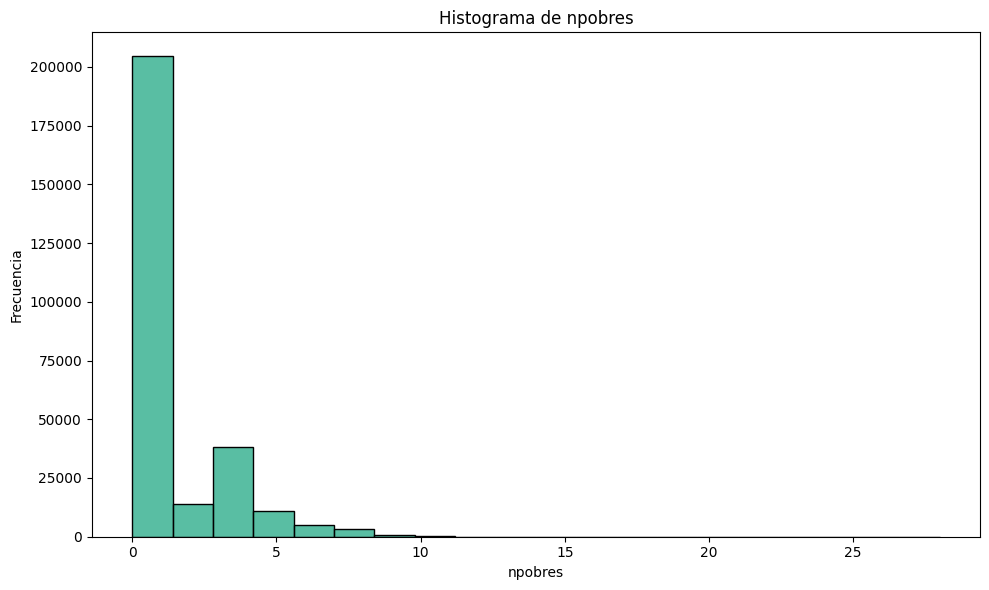

In [24]:
print(obtener_frecuencia_valores(df_hogares, 'npobres'))
graficar_histograma(df_hogares, 'npobres')

### Variables `nindigentes`

Número de personas en hogares clasificados en pobreza extrema.

nindigentes
0     249533
3       6121
4       5655
2       4901
5       3647
1       3607
6       1889
7        907
8        429
9        221
10       117
11        63
12        36
13        11
14         8
15         4
16         3
18         2
19         1
28         1
17         1
20         1
Name: count, dtype: int64


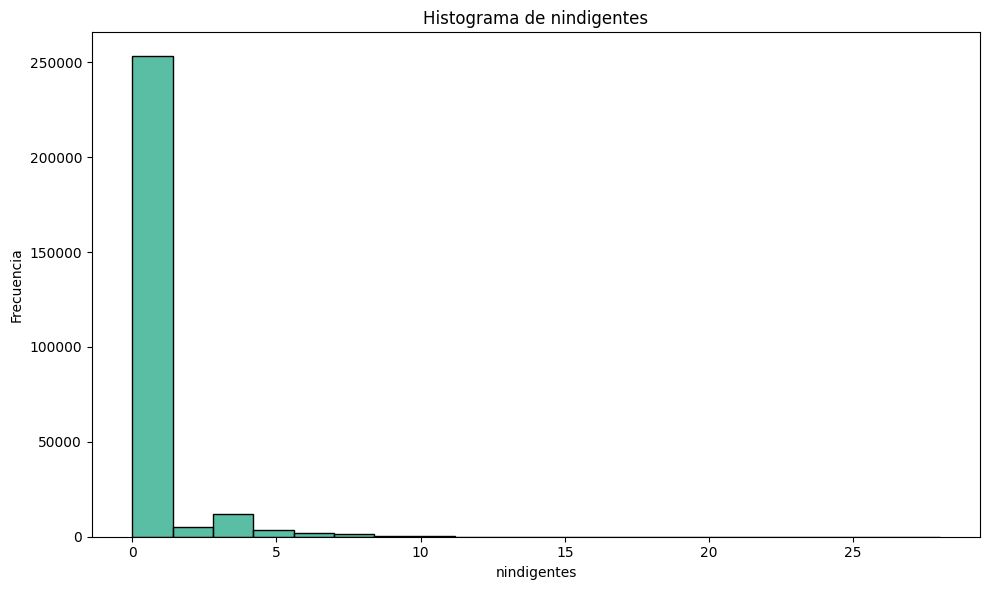

In [25]:
print(obtener_frecuencia_valores(df_hogares, 'nindigentes'))
graficar_histograma(df_hogares, 'nindigentes')

### Variable `fex_c`

Corresponde al Factor de expansión utilizado en el análisis. El factor de expansión se utiliza para ajustar los resultados de una muestra para que sean representativos de la población total. Puede utilizarse como un peso para dar más importancia a ciertos hogares en función de su representación en la población. Esto es especialmente útil si tienes un conjunto de datos que no es proporcional a la población total.

fex_c
23.660798     22
20.703198     21
11.893473     21
14.523270     21
15.482176     20
              ..
100.162139     1
129.856572     1
111.512835     1
124.779584     1
3.748531       1
Name: count, Length: 223165, dtype: int64


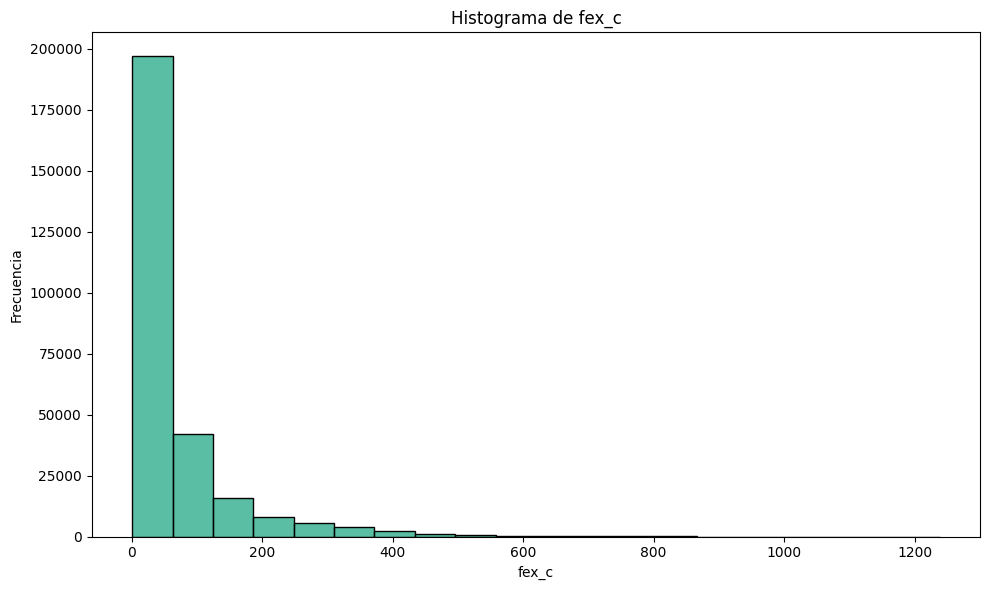

In [26]:
print(obtener_frecuencia_valores(df_hogares, 'fex_c'))
graficar_histograma(df_hogares, 'fex_c')

Con el fin de mejorar la legibilidad y facilitar el análisis de datos, se han renombrado la columnas del dataframe con nombres más cortos y descriptivos. Este cambio permite identificar más facilmente el contenido de cada variable sin perder su significado original. 

In [27]:
df_pobreza_desigualdad = df_hogares[['directorio', 'secuencia_p', 'clase', 'dominio', 'p5090', 
                                    'li','lp', 'pobre', 'indigente', 'npobres', 'nindigentes', 'fex_c']].copy()

# Renombrar las columnas
df_pobreza_desigualdad = df_pobreza_desigualdad.rename(columns={
    'directorio': 'id_hogar',
    'secuencia_p': 'id_sec',
    'clase': 'tipo_area',
    'dominio': 'region',
    'p5090': 'tenencia_viv',
    'li': 'linea_indig',
    'lp': 'linea_pobreza',
    'pobre': 'hogar_pobre',
    'indigente': 'hogar_indigente',
    'npobres': 'num_pobres',
    'nindigentes': 'num_indigentes',
    'fex_c': 'factor_exp'
})

df_pobreza_desigualdad.head()

,id_hogar,id_sec,tipo_area,region,tenencia_viv,linea_indig,linea_pobreza,hogar_pobre,hogar_indigente,num_pobres,num_indigentes,factor_exp
0,7309060,1,cabecera,RESTO URBANO,En arriendo o subarriendo,211838.33655,393677.759609,no,no,0,0,131.723106
1,7309061,1,cabecera,RESTO URBANO,"Propia, la están pagando",211838.33655,393677.759609,no,no,0,0,83.471732
2,7309062,1,cabecera,RESTO URBANO,En usufructo,211838.33655,393677.759609,no,no,0,0,106.360970
3,7309063,1,cabecera,RESTO URBANO,En usufructo,211838.33655,393677.759609,no,no,0,0,106.360970
4,7309064,1,resto,RURAL,En arriendo o subarriendo,164635.13660,270748.848811,no,no,0,0,27.049855


## Dataframe Hogares `df_personas`

### Vista General del DataFrame: Dimensiones y diccionario de datos

In [28]:
print('dimensiones dataframe:', df_personas.shape)
print('Información: ')
print('-'*30)
print(df_personas.info())
df_personas.head()

dimensiones dataframe: (814665, 130)
Información: 
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814665 entries, 0 to 814664
Columns: 130 entries, directorio to fex_c
dtypes: float64(120), int64(9), object(1)
memory usage: 808.0+ MB
None


,directorio,secuencia_p,orden,clase,dominio,mes,p3271,p6040,p6050,p6090,...,imdies,iof1es,iof2es,iof3hes,iof3ies,iof6es,ingtotob,ingtotes,ingtot,fex_c
0,7309060,1,1,1,RESTO URBANO,1,2,32,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1000000.0,NaN,1000000.0,131.723106
1,7309060,1,2,1,RESTO URBANO,1,1,27,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN,1200000.0,131.723106
2,7309061,1,1,1,RESTO URBANO,1,2,48,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2200000.0,NaN,2200000.0,83.471732
3,7309061,1,2,1,RESTO URBANO,1,1,57,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,650000.0,280000.0,930000.0,83.471732
4,7309062,1,1,1,RESTO URBANO,1,1,68,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,NaN,500000.0,106.360970


El DataFrame df_hogares tiene una dimensión de 814,665 filas y 130 columnas, lo que representa una base de datos extensa con un gran volumen de registros. La estructura de datos se detalla de la siguiente manera:

Número de Entradas: 814,665 registros.
Número de Columnas: 130 columnas.
Tipos de Datos:
* float64: 120 columnas.
* int64: 9 columnas.
* object: 1 columna (generalmente para datos de texto o categóricos).

La información en el DataFrame está diseñada para proporcionar un análisis completo de las características socioeconómicas y demográficas de las personsa que integran los hogares. La descripción de las columnas y su tipo de dato se puede consultar en: [Diccionario de datos Dataframe Personas](https://github.com/kellyninor/ProyectoCare/blob/main/docs/tables/personas.md).

### Validación de Valores Nulos

In [29]:
evaluar_nulos(df_personas, df_personas.columns)

,Columna,Nulos
122,iof2es,814639
124,iof3ies,814591
120,imdies,814550
118,isaes,814492
121,iof1es,814399
...,...,...
5,mes,0
4,dominio,0
3,clase,0
2,orden,0


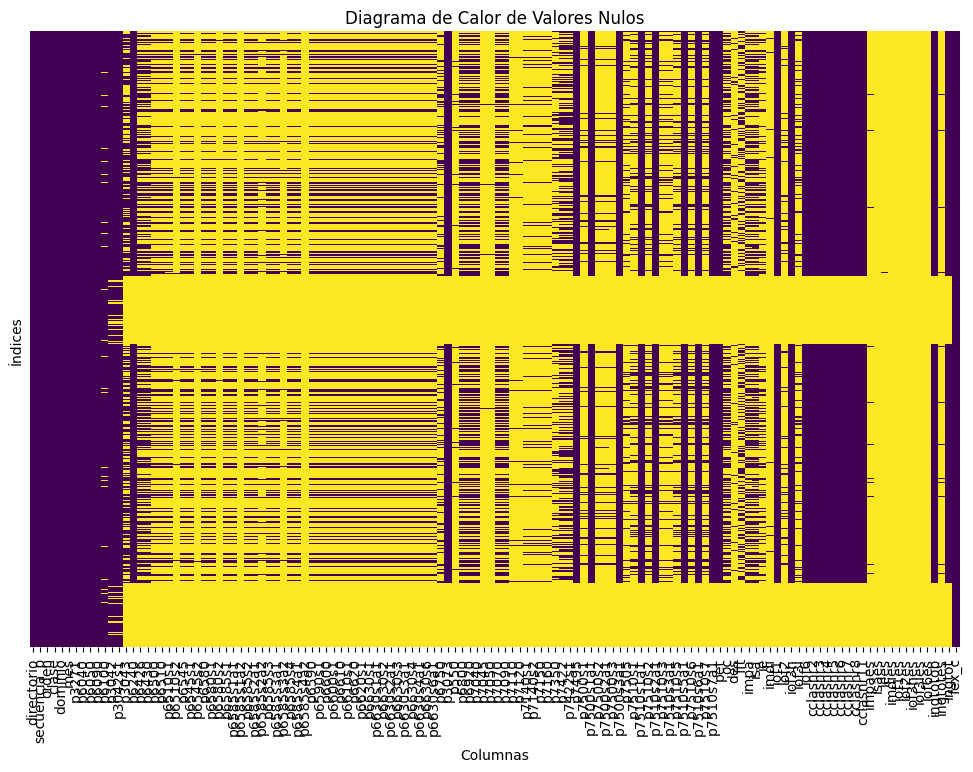

In [30]:
visualizar_nulos(df_personas)

En el análisis del DataFrame, se ha identificado una significativa cantidad de valores nulos en la mayoría de las columnas. Las columnas con el mayor número de nulos incluyen `iof2es`, `iof3ies`, `imdies`, y `isaes`, que presentan valores nulos superiores a 800,000. Estas columnas podrían estar relacionadas con datos específicos o adicionales que no se han registrado en muchos casos, y su alta tasa de nulos puede indicar que la información no se recopiló de manera uniforme o que estos datos no son aplicables a la mayoría de los registros.

En contraste, columnas como `directorio`, `secuencia_p`, `p6090`, `p6050`, `p6040`, `p3271`, `mes`, `dominio`, `clase`, `orden`, y `fex_c` presentan cero valores nulos, lo que indica que los datos están completos y bien registrados en estas columnas clave. Estas columnas suelen contener identificadores únicos y variables importantes para la estructura del hogar y las personas, y su integridad es crucial para la análisis.

La presencia de valores nulos en un número considerable de columnas puede afectar la calidad del análisis y la interpretación de los datos. Para abordar esto, es esencial considerar técnicas para manejar estos nulos, como imputación o exclusión, dependiendo del contexto y la importancia de las columnas afectadas.

### Imputación de datos nulos en variables numéricas que representan ingresos

Las siguientes columnas del dataframe `df_personas` corresponden a ingresos y tienen nulos: `p6500`, `p6510s1`, `p6545s1`, `p6580s1`, `p6585s1a1`, `p6585s2a1`, `p6585s3a1`, `p6585s4a1`, `p6590s1`, `p6600s1`, `p6610s1`,`p6620s1`, `p6630s1a1`, `p6630s2a1`, `p6630s3a1`, `p6630s4a1`, `p6630s6a1`, `p6750`, `p550`, `p7070`, `p7422s1`, `p7500s1a1`, `p7500s2a1`,`p7500s3a1`, `p7510s1`, `p7510s1a1`, `p7510s2a1`, `p7510s3a1`, `p7510s5a1`, `p7510s6a1`,`impa`, `isa`, `ie`, `imdi`, `iof1`, `iof2`, `iof3h`, `iof3i`, `iof6`, `impaes`, `isaes`, `iees`, `imdies`, `iof1es`, `iof2es`, `iof3hes`, `iof3ies`, `iof6es`, `ingtotob`, `ingtotes`, `ingtot`.

Según la descripción la [documentación del conjunto de datos del DANE](https://microdatos.dane.gov.co/index.php/catalog/835/pdf-documentation), para este tipo de preguntas si el encuestado no informa que no sabe el valor del ingreso el registro debería ser 98 y si no informa el valor, se debía registrar un 99. Estos valores también se considerarían como nulos. Por tanto con el metodo se analizó cuantos de estas columnas de ingresos tienen un registro en 98 o 99, y ninguna de ellas cuenta con estos valores. 

In [31]:
columnas_ingresos = [
    "p6500", "p6510s1", "p6545s1", "p6580s1", "p6585s1a1", "p6585s2a1", "p6585s3a1", 
    "p6585s4a1", "p6590s1", "p6600s1", "p6610s1", "p6620s1", "p6630s1a1", "p6630s2a1", 
    "p6630s3a1", "p6630s4a1", "p6630s6a1", "p6750", "p550", "p7070", "p7422s1", "p7500s1a1", 
    "p7500s2a1", "p7500s3a1", "p7510s1", "p7510s1a1", "p7510s2a1", "p7510s3a1", "p7510s5a1", 
    "p7510s6a1", "impa", "isa", "ie", "imdi", "iof1", "iof2", "iof3h", "iof3i", "iof6", 
    "impaes", "isaes", "iees", "imdies", "iof1es", "iof2es", "iof3hes", "iof3ies", "iof6es", 
    "ingtotob", "ingtotes", "ingtot"
]

# Filtrar las columnas relevantes de ingresos
df_ingresos = df_personas[columnas_ingresos]

# Verificar si hay registros con los valores 98 o 99 en alguna de las columnas
valores_98_99 = df_ingresos.isin([98, 99]).any()

# Filtrar las columnas que contienen registros con valores 98 o 99
columnas_con_valores_98_99 = valores_98_99[valores_98_99].index.tolist()

print("Columnas con registros que contienen los valores 98 o 99:")
print(columnas_con_valores_98_99)

Columnas con registros que contienen los valores 98 o 99:
[]


#### ¿Como podemos imputar las columnas asociadas a ingresos?

En el contexto de datos proporcionado por el DANE, se observó que la columna `ingtot` que representa el total de ingresos por persona, resulta de sumar los ingresos observados `ingtotob` y los ingresos imputados `ingtotes` (`ingtot` = `ingtotob`+ `ingtotes`). 

Según lo observado en el conjunto de datos, las variables `ingtotob` ni `ingtot` contiene nulos, pero la variable `ingtotes` tiene 269883 valores nulos. En los casos en donde la variable `ingtotes` es nula, `ingtot` es igual `ingtotob`(`ingtot` = `ingtotob`). Dado que la variable `ingtotes` nula implica la ausencia de imputación y la falta de ingresos adicionales, este valor se puede considerar como cero para simplificar el análisis y mantener la consistencia en la imputación de datos. 

Esta estrategia es coherente con el comportamiento observado en el conjunto de datos y se alinea con la forma en que el DANE ha manejado la imputación de ingresos, donde los valores nulos se interpretan como la ausencia de imputación. 

Imputar los valores nulos de ingresos con cero no solo facilita la interpretación de los datos, sino que también asegura que el análisis sea consistente y refleje con precisión la realidad económica reportada por la encuesta. Este enfoque permite un tratamiento uniforme de los datos, optimizando la calidad de los análisis y mejorando la precisión en la identificación de patrones de ingresos y pobreza en la población objetivo.

Por tal razón las variables asociadas a ingresos serán imputadas con cero. 

In [32]:
def imputar_valores_nulos(dataframe, columnas, valor_imputacion):
    """
    Imputa los valores nulos de las columnas especificadas con el valor dado.
    
    Parámetros:
    - dataframe: El DataFrame en el que se desea imputar los valores nulos.
    - columnas: Un array de nombres de columnas cuyos valores nulos serán imputados.
    - valor_imputacion: El valor que se utilizará para reemplazar los valores nulos.
    """
    # Verificar si las columnas existen en el DataFrame
    columnas_existentes = [col for col in columnas if col in dataframe.columns]
    
    for columna in columnas_existentes:
        dataframe[columna].fillna(valor_imputacion, inplace=True)
    
    return dataframe

df_personas = imputar_valores_nulos(df_personas, columnas_ingresos,0)

In [33]:
# Imputación de columnas nulas con la opción 99, no sabe no Informa
imputar_con_99 = ['p3042','p3042s1','p3043','p3073','p7045','p7510s7a1']
df_personas = imputar_valores_nulos(df_personas, imputar_con_99,99)

#Imputación de columnas nulas con la opción 999, no sabe no Informa
imputar_con_999 = ['p6426','p6800']
df_personas = imputar_valores_nulos(df_personas, imputar_con_999,999)

# Imputación de columnas nulas con la opción 9, No sabe no Informa
imputar_con_9 = ['p6100', 'p6240', 'p6430', 'p6510','p6510s2','p6545','p6545s2','p6580','p6585s1','p6585s1a2','p6585s2',
                 'p6585s2a2','p6585s3','p6585s3a2','p6580s2','p6585s4','p6585s4a2','p6590','p6600','p6610','p6620','p6630s1',
                 'p6630s2','p6630s3','p6630s4','p6630s6','p6920','p7110','p7050','p7090','p7110','p7120','p7040','p7140s1',
                 'p7140s2','p7150','p7160','p7350','p7422','p7495','p7500s1','p7500s2','p7500s3','p7505','p7510s2','p7510s3',
                 'p7510s5','p7510s6','p7510s7']
df_personas = imputar_valores_nulos(df_personas, imputar_con_9,9)

# Imputación de columnas nulas con la opción 0, Observado
imputar_con_0 = ['pet','oc','des','fft']
df_personas = imputar_valores_nulos(df_personas, imputar_con_0,0)

### Conversión de las variables categóricas

Para mejorar el análisis del DataFrame `df_hogares`, es necesario convertir ciertas variables a tipo categórico. 

Las variables categóricas son aquellas que representan categorías discretas, respuestas a preguntas específicas, o etiquetas, en lugar de valores numéricos continuos. Estas variables suelen ser representadas con tipos de datos como enteros o cadenas de texto, pero sus valores corresponden a categorías distintas. En el caso del dataframe `df_personas`, las variables categóricas incluyen 70 columnas: 

`clase`, `dominio`, `mes`, `p3271`, `p6050`, `p6090`, `p6100`, `p3042`, `p3042s1`, `p3043`, `p6240`, `p6430`, `p6510`, `p6510s2`, `p6545`, `p6545s2`, `p6580`, `p6580s2`, `p6585s1`, `p6585s1a2`, `p6585s2`, `p6585s2a2`, `p6585s3`, `p6585s3a2`, `p6585s4`, `p6585s4a2`, `p6590`, `p6600`, `p6610`, `p6620`, `p6630s1`, `p6630s2`, `p6630s3`, `p6630s4`, `p6630s6`, `p6920`, `p7040`, `p7050`, `p7090`, `p7110`, `p7120`, `p7140s1`, `p7140s2`, `p7150`, `p7160`, `p7350`, `p7422`, `p7495`, `p7500s1`, `p7500s2`, `p7500s3`, `p7505`, `p7510s2`, `p7510s3`, `p7510s5`, `p7510s6`, `p7510s7`, `p7510s7a1`, `pet`, `oc`, `des`, `fft`, `cclasnr2`, `cclasnr3`, `cclasnr4`, `cclasnr5`, `cclasnr6`, `cclasnr7`, `cclasnr8`, `cclasnr11`

In [34]:
columnas_categoricas_df_personas = [
    "clase", "dominio", "mes", "p3271", "p6050", "p6090", "p6100", "p3042", 
    "p3042s1", "p3043", "p6240", "p6430", "p6510", "p6510s2", "p6545", 
    "p6545s2", "p6580", "p6580s2", "p6585s1", "p6585s1a2", "p6585s2", 
    "p6585s2a2", "p6585s3", "p6585s3a2", "p6585s4", "p6585s4a2", "p6590", 
    "p6600", "p6610", "p6620", "p6630s1", "p6630s2", "p6630s3", "p6630s4", 
    "p6630s6", "p6920", "p7040", "p7050", "p7090", "p7110", "p7120", 
    "p7140s1", "p7140s2", "p7150", "p7160", "p7350", "p7422", "p7495", "p7505",
    "p7500s1", "p7500s2", "p7500s3", "p7510s5", "p7510s6", "p7510s7", 
    "p7510s7a1", "pet", "oc", "des", "fft", "cclasnr2", "cclasnr3", "cclasnr4", "cclasnr5", 
    "cclasnr6", "cclasnr7", "cclasnr8", "cclasnr11", "p7510s2","p7510s3"
]

#Cantidad de columnas
print(len(columnas_categoricas_df_personas))
df_personas = convert_to_categorical(df_personas, columnas_categoricas_df_personas)

70


#### Identificación Única de Miembros del Hogar en el DataFrame

En el análisis del DataFrame `df_personas`, se ha validado que la combinación de las columnas `directorio`, `secuencia_p` y `orden` identifica de manera única a cada miembro del hogar. De acuerdo con el diccionario de datos, al igual que en el dataframe `df_hogares`la columna `directorio` representa el identificador único del hogar, `secuencia_p` proporciona una secuencia de identificación adicional dentro del hogar, y `orden` actúa como el identificador específico de cada persona dentro del hogar. Para asegurar la unicidad en la identificación de los miembros del hogar, se verificó que no existieran registros duplicados basados en la combinación de estas tres columnas. El análisis reveló que cada combinación de `directorio`, `secuencia_p` y orden es única en el DataFrame, garantizando que cada miembro del hogar esté representado de manera individual y que no haya duplicados o inconsistencias en los datos. Esta validación es esencial para mantener la integridad de los datos y para asegurar que cualquier análisis subsiguiente sobre los miembros del hogar se realice sobre una base sólida y precisa.

In [35]:
# Primero, verificamos que no hay duplicados en la combinación de las tres columnas
duplicados_personas = df_personas.duplicated(subset=['directorio', 'secuencia_p', 'orden'], keep=False)

# Mostrar el número de registros duplicados (si existe alguno)
num_duplicados_personas = duplicados_personas.sum()

# Crear un DataFrame que muestra duplicados si existen
df_duplicados_personas = df_personas[duplicados_personas]

# Verificar la combinación única de directorio, secuencia_p y orden
# Contar el número de registros únicos según la combinación
num_miembros_unicos = df_personas[['directorio', 'secuencia_p', 'orden']].drop_duplicates().shape[0]

# Contar el total de registros en el DataFrame
num_registros_totales_personas = df_personas.shape[0]

print(f'Número total de registros en df_personas: {num_registros_totales_personas}')
print(f'Número de registros únicos (combinación de directorio, secuencia_p y orden): {num_miembros_unicos}')
print(f'Número de registros duplicados en la combinación directorio, secuencia_p y orden: {num_duplicados_personas}')

if num_duplicados_personas > 0:
    print('Ejemplos de registros duplicados:')
    print(df_duplicados_personas.head())

# Validar si la combinación de directorio, secuencia_p y orden es única para cada miembro del hogar
if num_miembros_unicos == num_registros_totales_personas:
    print('La combinación de directorio, secuencia_p y orden identifica de manera única a cada miembro del hogar.')
else:
    print('Existen duplicados en la combinación de directorio, secuencia_p y orden, lo cual indica que no todos los miembros del hogar están identificados de manera única.')

Número total de registros en df_personas: 814665
Número de registros únicos (combinación de directorio, secuencia_p y orden): 814665
Número de registros duplicados en la combinación directorio, secuencia_p y orden: 0
La combinación de directorio, secuencia_p y orden identifica de manera única a cada miembro del hogar.


### Estadísticas descriptivas

In [36]:
print("Estadísticas descriptivas variables categóricas:")
df_personas.select_dtypes(include=['object', 'category']).describe()

Estadísticas descriptivas variables categóricas:


,clase,dominio,mes,p3271,p6050,p6090,p6100,p3042,p3042s1,p3043,...,des,fft,cclasnr2,cclasnr3,cclasnr4,cclasnr5,cclasnr6,cclasnr7,cclasnr8,cclasnr11
count,814665,814665,814665,814665,814665,814665,814665.0,814665.0,814665.0,814665.0,...,814665.0,814665.0,639719.0,639719.0,639719.0,639719.0,639719.0,639719.0,639719.0,639719.0
unique,2,25,12,2,13,3,4.0,14.0,22.0,11.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,1,RESTO URBANO,2,2,3,1,3.0,3.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,702737,128516,70077,433666,279234,778427,425919.0,197760.0,260010.0,415672.0,...,769918.0,565241.0,633179.0,639546.0,638061.0,639614.0,639453.0,639699.0,637808.0,639266.0


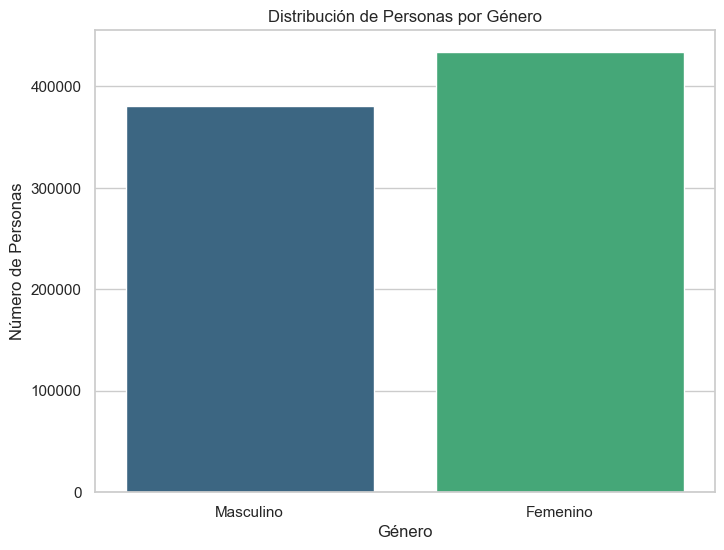

In [37]:
# Mapear valores numéricos a nombres descriptivos
df_personas['genero'] = df_personas['p3271'].map({1: 'Masculino', 2: 'Femenino'})

# Configura el estilo y tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crear gráfico de conteo para la columna de género
sns.countplot(data=df_personas, x='genero', order=['Masculino', 'Femenino'], palette='viridis')

# Añadir título y etiquetas
plt.title('Distribución de Personas por Género')
plt.xlabel('Género')
plt.ylabel('Número de Personas')

# Mostrar gráfico
plt.show()

In [38]:
# Mapear valores numéricos a nombres descriptivos
df_personas['genero'] = df_personas['p3271'].map({1: 'Masculino', 2: 'Femenino'})

# Calcular la proporción por género
proporcion_genero = df_personas['genero'].value_counts(normalize=True) * 100

# Imprimir la proporción por género
print(proporcion_genero)

genero
Femenino     53.232433
Masculino    46.767567
Name: proportion, dtype: float64


Hay más personas del género femenino (433,666) que del género masculino (380,999) en el dataframe `df_hogares`. Esto sugiere que, en el conjunto de datos, las mujeres representan una mayor proporción de la población.

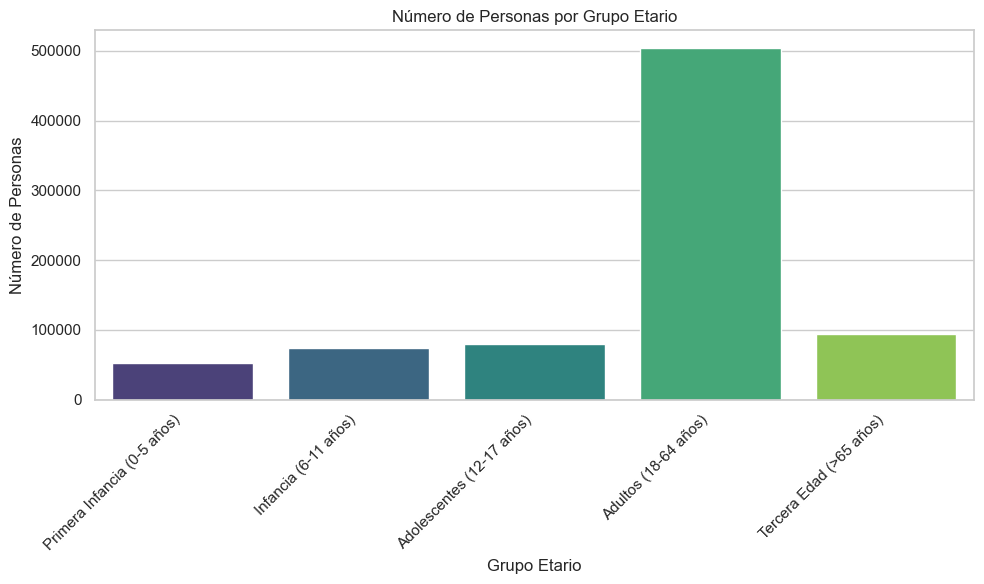

In [39]:
# Definir los rangos de edad
bins = [0, 5, 11, 17, 64, 100]  # Definir los límites de los grupos etarios
labels = ['Primera Infancia (0-5 años)', 'Infancia (6-11 años)', 'Adolescentes (12-17 años)', 'Adultos (18-64 años)', 'Tercera Edad (>65 años)']

# Crear una nueva columna con el grupo etario basado en la edad
df_personas['Grupo_Etario'] = pd.cut(df_personas['p6040'], bins=bins, labels=labels, right=True)

# Contar el número de personas en cada grupo etario
df_grupo_etario = df_personas.groupby('Grupo_Etario').size().reset_index(name='Numero_de_Personas')

# Crear la gráfica de barras usando Seaborn con la paleta 'viridis'
plt.figure(figsize=(10, 6))
sns.barplot(x='Grupo_Etario', y='Numero_de_Personas', data=df_grupo_etario, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Número de Personas por Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Número de Personas')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

El análisis de la distribución por grupos etarios revela información clave para la planificación de políticas y servicios. La mayoría de la población se encuentra en el grupo de `Adultos` (18-64 años), lo que indica una fuerte base laboral y económica. Los grupos de `Primera Infancia` (0-5 años) e `Infancia` (6-11 años) también tienen una representación significativa, sugiriendo la necesidad de invertir en educación y salud infantil. Los `Adolescentes` (12-17 años) representan una porción importante, destacando la importancia de programas educativos y de desarrollo juvenil. Aunque la `Tercera Edad` (>65 años) tiene una representación menor, sigue siendo crucial atender sus necesidades de salud y bienestar. Este perfil demográfico puede guiar la asignación de recursos y el diseño de intervenciones específicas para cada grupo etario.

### Información consolidada del dataframe `df_personas`

En el marco del análisis de datos del proyecto, se realiza un análisis del DataFrame `df_personas` para consolidar la información de hogares y personas, con el objetivo de enriquecer la información obtenida del DataFrame de hogares `df_hogares`. Para lograr esto, es necesario crear nuevas variables agrupadas que consoliden la información de todos los miembros de un hogar.

In [40]:
# Creamos una consolidación de información de personas por hogar
df_consolidado_hogar_personas = df_personas[['directorio','secuencia_p']].drop_duplicates().reset_index(drop=True)
df_consolidado_hogar_personas.shape

(277158, 2)

##### 1. Numero de personas por hogar

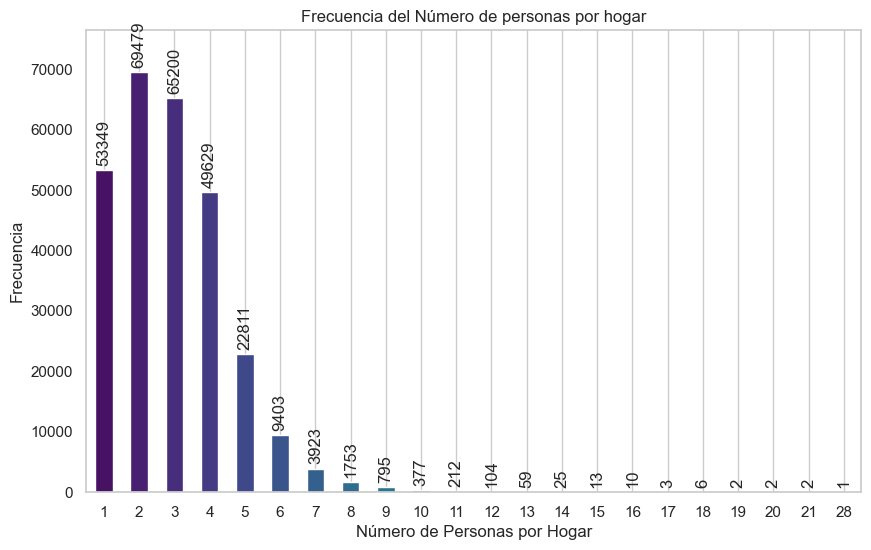

In [41]:
# Agrupamos por 'directorio' y 'secuencia_p' (identificadores únicos del hogar) y contamos el número de personas en cada hogar
personas_por_hogar = df_personas.groupby(['directorio', 'secuencia_p'])['orden'].size()

# Calculamos la frecuencia del número de personas por hogar
frecuencia_personas_por_hogar = personas_por_hogar.value_counts().sort_index()

# Generamos un gráfico de barras para visualizar la frecuencia del número de personas por hogar
plt.figure(figsize=(10, 6))

# Aplicar la paleta viridis
colors = sns.color_palette('viridis', n_colors=len(frecuencia_personas_por_hogar))

ax = frecuencia_personas_por_hogar.plot(kind='bar', color=colors)
plt.title('Frecuencia del Número de personas por hogar')
plt.xlabel('Número de Personas por Hogar')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Ajustamos el límite superior del eje y para que haya espacio para las etiquetas
plt.ylim(0, frecuencia_personas_por_hogar.max() * 1.1)

# Añadir etiquetas en las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, rotation=90)

plt.show()

El diagrama de barras muestra la distribución del número de personas por hogar, revelando varios puntos interesantes sobre la estructura de los hogares en la base de datos:

* **Predominio de Hogares Pequeños:** La distribución está claramente sesgada hacia la izquierda, con una concentración alta en el rango de 1 a 4 personas por hogar.En particular, los hogares con 2 personas son los más comunes, con una frecuencia de 69479, seguidos por los hogares con 3 personas (65200) y hogares de 1 persona (53,349). Esto podría ser indicativo de familias nucleares (parejas o familias con pocos hijos) o de hogares unipersonales, que son cada vez más comunes.

* **Decrecimiento de la Frecuencia con el Tamaño del Hogar:** A medida que aumenta el número de personas por hogar, la frecuencia disminuye. Después de los hogares de 4 personas (49629), la cantidad de hogares con más personas cae significativamente. Los hogares de 5 personas tienen una frecuencia de 22811, mientras que aquellos con 6 o más personas son mucho menos comunes.

* **Hogares Grandes Son Menos Comunes:** Los hogares con 7 o más personas son relativamente raros. Por ejemplo, solo hay 3923 hogares con 7 personas, y esta cifra sigue disminuyendo a medida que el número de personas aumenta. Los hogares con 10 personas tienen una frecuencia de apenas 377, lo que representa una pequeña fracción de todos los hogares. Como datos extremos tenemos hogares con más de 20 personas: un hogar tiene 28 personas. 

En resumen, los datos muestran una predominancia de hogares pequeños en el conjunto analizado, con una disminución gradual en la frecuencia de hogares a medida que aumenta el número de personas.

In [42]:
# Inclusión del numero de personas por hogar en una nueva columna total_personas_hogar
personas_por_hogar = df_personas.groupby(['directorio', 'secuencia_p'])['orden'].size().reset_index(name='total_personas_hogar')
df_consolidado_hogar_personas = df_consolidado_hogar_personas.merge(personas_por_hogar, on=['directorio', 'secuencia_p'], how='left')
print(df_consolidado_hogar_personas.shape)
df_consolidado_hogar_personas.head()

(277158, 3)


,directorio,secuencia_p,total_personas_hogar
0,7309060,1,3
1,7309061,1,2
2,7309062,1,1
3,7309063,1,1
4,7309064,1,5


#### 2.Total Ingresos Laborales

En el contexto de nuestro proyecto, hemos creado una nueva columna llamada `ingresos_laborales` en el DataFrame `df_consolidado_hogar_personas`, con el objetivo de consolidar y analizar de manera integral los ingresos de los miembros del hogar provenientes de diversas fuentes laborales. En esta columna se calcula sumando los valores de las siguientes variables, con la conversión adecuada para reflejar los ingresos mensuales:

* Salario antes de descuentos (`p6500`) - Mensual
* Horas extras (`p6510s1`) - Mensual
* Primas (`p6545s1`) - Mensual
* Bonificaciones (`p6580s1`) - Mensual
* Alimentos como parte de pago (`p6590s1`) - Mensual
* Vivienda como parte de pago (`p6600s1`) - Mensual
* Transporte (`p6610s1`) - Mensual
* Otros ingresos en especie (`p6620s1`) - Mensual
* Prima de servicios (`p6630s1a1`) - Anual (convertido a mensual dividiendo por 12)
* Prima de navidad (`p6630s2a1`) - Anual (convertido a mensual dividiendo por 12)
* Prima de vacaciones (`p6630s3a1`) - Anual (convertido a mensual dividiendo por 12)
* Viáticos permanentes (`p6630s4a1`) - Anual (convertido a mensual dividiendo por 12)
* Bonificaciones anuales (`p6630s6a1`) - Anual (convertido a mensual dividiendo por 12)
* Ganancia neta en actividad secundaria (`p6750`) - Mensual
* Ganancia neta de negocio o cosecha (`p550`) - Anual (convertido a mensual dividiendo por 12)
* Ingresos de segundo trabajo (`p7070`) - Mensual
* Ingresos por segundo trabajo (`p7422s1`) - Mensual

Al tener un valor mensual consolidado de los ingresos laborales, se facilita la evaluación de la situación económica de los hogares. Es posible comparar fácilmente el total de ingresos laborales con otros factores económicos, como gastos y ahorro, para entender mejor la estabilidad financiera de cada hogar. Con una visión clara de los ingresos laborales, el proyecto puede identificar hogares con necesidades específicas y desarrollar estrategias de intervención que se alineen con su capacidad económica. Esto puede incluir programas de apoyo financiero o asistencia en función de los niveles de ingresos reportados.

In [43]:
# Lista de columnas y su tipo de frecuencia
columnas_ingresos_laborales = {
    'p6500': 'mensual',
    'p6510s1': 'mensual',
    'p6545s1': 'mensual',
    'p6580s1': 'mensual',
    'p6590s1': 'mensual',
    'p6600s1': 'mensual',
    'p6610s1': 'mensual',
    'p6620s1': 'mensual',
    'p6630s1a1': 'anual',   # Prima de servicios anual
    'p6630s2a1': 'anual',   # Prima de Navidad anual
    'p6630s3a1': 'anual',   # Prima de vacaciones anual
    'p6630s4a1': 'anual',   # Viáticos permanentes anual
    'p6630s6a1': 'anual',   # Bonificaciones anuales
    'p6750': 'mensual',     # va dividido por el numero de meses que se indica en p3073
    'p550': 'anual',        # Ganancia neta anual
    'p7070': 'mensual',
    'p7422s1': 'mensual'
}

# Crear una copia del DataFrame original
df_personas_copy = df_personas.copy()

# Crear columnas temporales para ingresos ajustados en la copia
df_personas_copy['ingresos_ajustados_p6510s1'] = np.where((df_personas_copy['p6510s2'] == 1) | (df_personas_copy['p6510'] == '2'), 0, df_personas_copy['p6510s1'])
df_personas_copy['ingresos_ajustados_p6545s1'] = np.where((df_personas_copy['p6545s2'] == 1) | (df_personas_copy['p6545'] == '2'), 0, df_personas_copy['p6545s1'])
df_personas_copy['ingresos_ajustados_p6580s1'] = np.where((df_personas_copy['p6580s2'] == 1) | (df_personas_copy['p6580'] == '2'), 0, df_personas_copy['p6580s1'])
df_personas_copy['ingresos_ajustados_p6590s1'] = np.where(df_personas_copy['p6590'] == '2', 0, df_personas_copy['p6590s1'])
df_personas_copy['ingresos_ajustados_p6600s1'] = np.where(df_personas_copy['p6600'] == '2', 0, df_personas_copy['p6600s1'])
df_personas_copy['ingresos_ajustados_p6610s1'] = np.where(df_personas_copy['p6610'] == '2', 0, df_personas_copy['p6610s1'])
df_personas_copy['ingresos_ajustados_p6620s1'] = np.where(df_personas_copy['p6620'] == '2', 0, df_personas_copy['p6620s1'])
df_personas_copy['ingresos_ajustados_p6630s1a1'] = np.where(df_personas_copy['p6630s1'] == '2', 0, df_personas_copy['p6630s1a1'])
df_personas_copy['ingresos_ajustados_p6630s2a1'] = np.where(df_personas_copy['p6630s2'] == '2', 0, df_personas_copy['p6630s2a1'])
df_personas_copy['ingresos_ajustados_p6630s3a1'] = np.where(df_personas_copy['p6630s3'] == '2', 0, df_personas_copy['p6630s3a1'])
df_personas_copy['ingresos_ajustados_p6630s4a1'] = np.where(df_personas_copy['p6630s4'] == '2', 0, df_personas_copy['p6630s4a1'])
df_personas_copy['ingresos_ajustados_p6630s6a1'] = np.where(df_personas_copy['p6630s6'] == '2', 0, df_personas_copy['p6630s6a1'])
df_personas_copy['ingresos_ajustados_p7422s1'] = np.where(df_personas_copy['p7422'] == '2', 0, df_personas_copy['p7422s1'])

# Ajustar p6750 basado en p3073 en la copia
df_personas_copy['ingresos_ajustados_p6750'] = np.where(
    pd.notna(df_personas_copy['p3073']),
    df_personas_copy['p6750'] / df_personas_copy['p3073'],  # División cuando p3073 no es NaN
    df_personas_copy['p6750']  # Valor original cuando p3073 es NaN
)

# Ajustar valores anuales dividiéndolos por 12 en la copia
for col in df_personas_copy.columns:
    if col in columnas_ingresos_laborales and columnas_ingresos_laborales[col] == 'anual':
        df_personas_copy[f'ingresos_ajustados_{col}'] = df_personas_copy[col] / 12

# Crear la columna 'ingresos_laborales' sumando todas las columnas especificadas, usando las columnas ajustadas donde sea necesario
columnas_list = list(columnas_ingresos_laborales.keys())

df_personas_copy['ingresos_laborales'] = (
    df_personas_copy[columnas_list]
    .assign(
        p6510s1=df_personas_copy['ingresos_ajustados_p6510s1'],
        p6545s1=df_personas_copy['ingresos_ajustados_p6545s1'],
        p6580s1=df_personas_copy['ingresos_ajustados_p6580s1'],
        p6750=df_personas_copy['ingresos_ajustados_p6750'],
        p6590s1=df_personas_copy['ingresos_ajustados_p6590s1'],
        p6600s1=df_personas_copy['ingresos_ajustados_p6600s1'],
        p6610s1=df_personas_copy['ingresos_ajustados_p6610s1'],
        p6620s1=df_personas_copy['ingresos_ajustados_p6620s1'],
        p6630s1a1=df_personas_copy['ingresos_ajustados_p6630s1a1'],
        p6630s2a1=df_personas_copy['ingresos_ajustados_p6630s2a1'],
        p6630s3a1=df_personas_copy['ingresos_ajustados_p6630s3a1'],
        p6630s4a1=df_personas_copy['ingresos_ajustados_p6630s4a1'],
        p6630s6a1=df_personas_copy['ingresos_ajustados_p6630s6a1'],
        p7422s1=df_personas_copy['ingresos_ajustados_p7422s1']
    )
    .sum(axis=1)
)

# Agrupar por 'directorio' y 'secuencia_p' y calcular la suma de 'ingresos_laborales' para cada hogar
ingresos_laborales_por_hogar = df_personas_copy.groupby(['directorio', 'secuencia_p'])['ingresos_laborales'].sum().reset_index()

# Añadir la columna 'ingresos_laborales' al DataFrame 'df_consolidado_hogar_personas'
df_consolidado_hogar_personas = pd.merge(df_consolidado_hogar_personas, ingresos_laborales_por_hogar, on=['directorio', 'secuencia_p'], how='left')

# Eliminar las columnas temporales de la copia
df_personas_copy.drop(columns=[
    'ingresos_ajustados_p6510s1', 'ingresos_ajustados_p6545s1', 'ingresos_ajustados_p6580s1', 'ingresos_ajustados_p6750',
    'ingresos_ajustados_p6590s1', 'ingresos_ajustados_p6600s1', 'ingresos_ajustados_p6610s1', 'ingresos_ajustados_p6620s1',
    'ingresos_ajustados_p6630s1a1', 'ingresos_ajustados_p6630s2a1', 'ingresos_ajustados_p6630s3a1', 'ingresos_ajustados_p6630s4a1',
    'ingresos_ajustados_p6630s6a1', 'ingresos_ajustados_p7422s1'
], inplace=True)

#### 3. Total Ingresos por subsidios

En este análisis, se consideran diferentes tipos de subsidios y ayudas monetarias recibidas por los hogares. A continuación, se detallan las fuentes específicas de estos ingresos:

* Subsidio de Alimentación (`p6585s1a1`): Este subsidio corresponde a la cantidad recibida por concepto de alimentación. 
* Subsidio de Transporte (`p6585s2a1`): Se refiere a la cantidad recibida en concepto de subsidio para transporte. 
* Subsidio Familiar (`p6585s3a1`): Este ingreso representa el subsidio recibido por motivos familiares.
* Subsidio Educativo (`p6585s4a1`): Corresponde al subsidio destinado a fines educativos.
* Ayudas Monetarias de Instituciones (`p7510s3a1`): Incluye el valor de las ayudas en dinero recibidas de instituciones tanto nacionales como internacionales.

Estos subsidios se han registrado para analizar su impacto y distribución en los hogares, facilitando la comprensión de cómo estas ayudas contribuyen al bienestar económico de las familias.

In [44]:
columnas_ingresos_subsidios = {
    'p6585s1a1': 'mensual',
    'p6585s2a1': 'mensual',
    'p6585s3a1': 'mensual',
    'p6585s4a1': 'mensual',
    'p7510s3a1': 'anual',   # Ayudas en dinero de instituciones del pais o fuera del pais anual
}

# Crear columnas temporales para ingresos ajustados
df_personas_copy['ingresos_ajustados_p6585s1a1'] = np.where((df_personas_copy['p6585s1a2'] == 1) | (df_personas_copy['p6585s1'] == '2'), 0, df_personas_copy['p6585s1a1'])
df_personas_copy['ingresos_ajustados_p6585s2a1'] = np.where((df_personas_copy['p6585s2a2'] == 1) | (df_personas_copy['p6585s2'] == '2'), 0, df_personas_copy['p6585s2a1'])
df_personas_copy['ingresos_ajustados_p6585s3a1'] = np.where((df_personas_copy['p6585s3a2'] == 1) | (df_personas_copy['p6585s3'] == '2'), 0, df_personas_copy['p6585s3a1'])
df_personas_copy['ingresos_ajustados_p6585s4a1'] = np.where((df_personas_copy['p6585s4a2'] == 1) | (df_personas_copy['p6585s4'] == '2'), 0, df_personas_copy['p6585s4a1'])
df_personas_copy['ingresos_ajustados_p7510s3a1'] = np.where((df_personas_copy['p7510s3'] == 2), 0, df_personas_copy['p7510s3a1'])

# Ajustar valores anuales dividiéndolos por 12 en la copia
for col in df_personas_copy.columns:
    if col in columnas_ingresos_subsidios and columnas_ingresos_subsidios[col] == 'anual':
        df_personas_copy[f'ingresos_ajustados_{col}'] = df_personas_copy[col] / 12

# Crear la columna 'ingresos_subsidios' sumando todas las columnas especificadas, usando las columnas ajustadas donde sea necesario
columnas_list = list(columnas_ingresos_subsidios.keys())

df_personas_copy['ingresos_subsidios'] = (
    df_personas_copy[columnas_list]
    .assign(
        p6585s1a1=df_personas_copy['ingresos_ajustados_p6585s1a1'],
        p6585s2a1=df_personas_copy['ingresos_ajustados_p6585s2a1'],
        p6585s3a1=df_personas_copy['ingresos_ajustados_p6585s3a1'],
        p6585s4a1=df_personas_copy['ingresos_ajustados_p6585s4a1'],
        p7510s3a1=df_personas_copy['ingresos_ajustados_p7510s3a1']
    )
    .sum(axis=1)
)

# Agrupar por 'directorio' y 'secuencia_p' y calcular la suma de 'ingresos_subsidios' para cada hogar
ingresos_subsidios_por_hogar = df_personas_copy.groupby(['directorio', 'secuencia_p'])['ingresos_subsidios'].sum().reset_index()

# Añadir la columna 'ingresos_laborales' al DataFrame 'df_consolidado_hogar_personas'
df_consolidado_hogar_personas = pd.merge(df_consolidado_hogar_personas, ingresos_subsidios_por_hogar, on=['directorio', 'secuencia_p'], how='left')

# Eliminar las columnas temporales de la copia
df_personas_copy.drop(columns=['ingresos_ajustados_p6585s1a1', 'ingresos_ajustados_p6585s2a1', 'ingresos_ajustados_p6585s3a1', 'ingresos_ajustados_p6585s4a1',
                               'ingresos_ajustados_p7510s3a1'], inplace=True)

#### 4. Otros ingresos no laborales

En esta categoria se agrupan los ingresos no laborales de todas las personas de un hogar como rentas, pensiones, remesas, intereses, cesantías, otros. En esta columna se calcula sumando los valores de las siguientes variables, con la conversión adecuada para reflejar los ingresos mensuales:

* Ingresos de transferencias: Incluye ingresos de otros hogares en el país o en el extranjero. Variables: `p7510s1a1`, `p7510s2a1`.
* Ingresos de alquileres: Incluye rentas de propiedades, vehículos, etc. Variable: `p7500s1a1`.
* Ingresos de pensiones: Incluye ingresos de pensiones de jubilación, invalidez, o alimentación. Variables: `p7500s2a1`, `p7500s3a1`.
* Ingresos financieros: Incluye ingresos por intereses de préstamos, CDT, utilidades, dividendos y cesantías. Variables: `p7510s5a1`, `p7510s6a1`.
* Ingresos otros: Incluye ingresos de fuentes diversas como juegos de azar, indemnizaciones, liquidaciones, venta de propiedades, etc. Variable: `p7510s7a1`.

In [45]:
columnas_otros_ingresos_no_laborales = {
    'p7500s1a1' : 'mensual',
    'p7500s2a1' : 'mensual',
    'p7500s3a1' : 'mensual',
    'p7510s1a1' : 'anual',
    'p7510s2a1' : 'anual',
    'p7510s5a1' : 'anual',
    'p7510s6a1' : 'anual',
    'p7510s7a1' : 'anual',
}

# Convertir columnas a numéricas, utilizando pd.to_numeric con el parámetro errors='coerce' para manejar valores no numéricos
for col in columnas_otros_ingresos_no_laborales.keys():
    df_personas_copy[col] = pd.to_numeric(df_personas_copy[col], errors='coerce')

    (df_personas_copy['p6585s1a2'] == 1) | (df_personas_copy['p6585s1'] == '2')

df_personas_copy['ingresos_ajustados_p7500s1a1'] = np.where((df_personas_copy['p7500s1'] == 2), 0, df_personas_copy['p7500s1a1'])
df_personas_copy['ingresos_ajustados_p7500s2a1'] = np.where((df_personas_copy['p7500s2'] == 2), 0, df_personas_copy['p7500s2a1'])
df_personas_copy['ingresos_ajustados_p7500s3a1'] = np.where((df_personas_copy['p7500s3'] == 2), 0, df_personas_copy['p7500s3a1'])
df_personas_copy['ingresos_ajustados_p7510s1a1'] = np.where((df_personas_copy['p7510s1'] == 2), 0, df_personas_copy['p7510s1a1'])
df_personas_copy['ingresos_ajustados_p7510s2a1'] = np.where((df_personas_copy['p7510s2'] == 2), 0, df_personas_copy['p7510s2a1'])
df_personas_copy['ingresos_ajustados_p7510s5a1'] = np.where((df_personas_copy['p7510s5'] == 2), 0, df_personas_copy['p7510s5a1'])
df_personas_copy['ingresos_ajustados_p7510s6a1'] = np.where((df_personas_copy['p7510s6'] == 2), 0, df_personas_copy['p7510s6a1'])
df_personas_copy['ingresos_ajustados_p7510s7a1'] = np.where((df_personas_copy['p7510s7'] == 2), 0, df_personas_copy['p7510s7a1'])

# Ajustar valores anuales dividiéndolos por 12 en la copia
for col in df_personas_copy.columns:
    if col in columnas_otros_ingresos_no_laborales and columnas_otros_ingresos_no_laborales[col] == 'anual':
        df_personas_copy[f'ingresos_ajustados_{col}'] = df_personas_copy[col] / 12

# Crear la columna 'otros_ingresos_no_laborales' sumando todas las columnas especificadas, usando las columnas ajustadas donde sea necesario
columnas_list = list(columnas_otros_ingresos_no_laborales.keys())

df_personas_copy['otros_ingresos_no_laborales'] = (
    df_personas_copy[columnas_list]
    .assign(
        p7500s1a1=df_personas_copy['ingresos_ajustados_p7500s1a1'],
        p7500s2a1=df_personas_copy['ingresos_ajustados_p7500s2a1'],
        p7500s3a1=df_personas_copy['ingresos_ajustados_p7500s3a1'],
        p7510s1a1=df_personas_copy['ingresos_ajustados_p7510s1a1'],
        p7510s2a1=df_personas_copy['ingresos_ajustados_p7510s2a1'],
        p7510s5a1=df_personas_copy['ingresos_ajustados_p7510s5a1'],
        p7510s6a1=df_personas_copy['ingresos_ajustados_p7510s6a1'],
        p7510s7a1=df_personas_copy['ingresos_ajustados_p7510s7a1']
    )
    .sum(axis=1)
)

# Agrupar por 'directorio' y 'secuencia_p' y calcular la suma de 'ingresos_subsidios' para cada hogar
otros_ingresos_no_laborales_por_hogar = df_personas_copy.groupby(['directorio', 'secuencia_p'])['otros_ingresos_no_laborales'].sum().reset_index()

# Añadir la columna 'ingresos_laborales' al DataFrame 'df_consolidado_hogar_personas'
df_consolidado_hogar_personas = pd.merge(df_consolidado_hogar_personas, otros_ingresos_no_laborales_por_hogar, on=['directorio', 'secuencia_p'], how='left')

# Eliminar las columnas temporales de la copia
df_personas_copy.drop(columns=['ingresos_ajustados_p7500s1a1','ingresos_ajustados_p7500s2a1','ingresos_ajustados_p7500s3a1',
                               'ingresos_ajustados_p7510s1a1','ingresos_ajustados_p7510s2a1','ingresos_ajustados_p7510s5a1',
                               'ingresos_ajustados_p7510s6a1','ingresos_ajustados_p7510s7a1'
                               ], inplace=True)

##### 5. Ingreso Total Hogar

Esta columna representa la suma total de los ingresos de las personas que componen un hogar, que incluye:

* **Ingresos Laborales:** La cantidad total recibida por trabajo, que puede incluir salarios, honorarios, y otras formas de compensación laboral.
* **Ingresos por Subsidios:** El total de subsidios recibidos, como subsidios de alimentación, transporte, familiar, educativo y ayudas monetarias de instituciones.
* **Otros Ingresos No Laborales:** Ingresos provenientes de otras fuentes, como arriendos, pensiones, intereses de inversiones, cesantías y otras fuentes no relacionadas con el trabajo.

Esta columna `ingreso_total_hogar` proporciona una visión integral de los recursos económicos disponibles para cada hogar, facilitando la evaluación de su situación financiera global. Puede ser utilizada para segmentar hogares según su capacidad económica, analizar patrones de ingresos, y realizar comparaciones entre diferentes grupos de hogares.

In [46]:
df_consolidado_hogar_personas['total_ingresos_hogar'] = (
    df_consolidado_hogar_personas['ingresos_laborales'] +
    df_consolidado_hogar_personas['ingresos_subsidios'] +
    df_consolidado_hogar_personas['otros_ingresos_no_laborales']
)

In [47]:
df_consolidado_hogar_personas.head()

,directorio,secuencia_p,total_personas_hogar,ingresos_laborales,ingresos_subsidios,otros_ingresos_no_laborales,total_ingresos_hogar
0,7309060,1,3,2200000.0,0.000000,8.25,2.200008e+06
1,7309061,1,2,2850000.0,0.000000,0.00,2.850000e+06
2,7309062,1,1,0.0,0.000000,500000.00,5.000000e+05
3,7309063,1,1,0.0,73333.333333,0.00,7.333333e+04
4,7309064,1,5,19580000.0,0.000000,200008.25,1.978001e+07


#### 6. Total Personas por grupo etarios

El código a continuación agrega columnas al dataframe `df_consolidado_hogar_personas`, cada una representando el total de personas en diferentes grupos etarios dentro de cada hogar, identificados por directorio y secuencia_p: 

* Primera Infancia: Niños de 0 a 5 años.
* Infantes: Niños de 6 a 11 años.
* Adolescentes: Jóvenes de 12 a 17 años.
* Adultos: Personas de 18 a 64 años.
* Tercera Edad: Personas de 65 años o más.

In [48]:
# Agregar columnas para cada segmento
df_consolidado_hogar_personas['total_adultos'] = df_personas[df_personas['p6040'].between(18, 64)].groupby(['directorio', 'secuencia_p'])['orden'].count().reindex(df_consolidado_hogar_personas.set_index(['directorio', 'secuencia_p']).index, fill_value=0).values
df_consolidado_hogar_personas['total_tercera_edad'] = df_personas[df_personas['p6040'] >= 65].groupby(['directorio', 'secuencia_p'])['orden'].count().reindex(df_consolidado_hogar_personas.set_index(['directorio', 'secuencia_p']).index, fill_value=0).values
df_consolidado_hogar_personas['total_primera_infancia'] = df_personas[df_personas['p6040'].between(0, 5)].groupby(['directorio', 'secuencia_p'])['orden'].count().reindex(df_consolidado_hogar_personas.set_index(['directorio', 'secuencia_p']).index, fill_value=0).values
df_consolidado_hogar_personas['total_infantes'] = df_personas[df_personas['p6040'].between(6, 11)].groupby(['directorio', 'secuencia_p'])['orden'].count().reindex(df_consolidado_hogar_personas.set_index(['directorio', 'secuencia_p']).index, fill_value=0).values
df_consolidado_hogar_personas['total_adolescentes'] = df_personas[df_personas['p6040'].between(12, 17)].groupby(['directorio', 'secuencia_p'])['orden'].count().reindex(df_consolidado_hogar_personas.set_index(['directorio', 'secuencia_p']).index, fill_value=0).values

Al revisar la información del DataFrame `df_personas`, es posible identificar mediante la variable `p6050` que persona es el **jefe de hogar**. Esta identificación y validación son cruciales para el proyecto por varias razones:

* Base para Segmentación y Análisis: Conocer que cada hogar tiene un jefe de hogar proporciona una base sólida para segmentar los hogares en función de sus características económicas y demográficas. Esto permite un análisis más preciso y efectivo, asegurando que las intervenciones se realicen con una comprensión clara de la estructura familiar.

* Responsabilidad y Decisiones: El jefe de hogar suele ser quien toma las decisiones financieras y actúa como el principal punto de contacto para asuntos relacionados con el hogar. Identificar a esta persona permite a CARE diseñar intervenciones alineadas con las responsabilidades y prioridades del hogar, aumentando la relevancia y efectividad de las iniciativas.

* Medición del Impacto: Para evaluar el impacto de las intervenciones y políticas, es esencial contar con una referencia clara, que en este caso es el jefe de hogar. Esto facilita la medición de cómo las intervenciones afectan a la cabeza del hogar y, por ende, al resto de la familia.

* Datos Completos: Verificar que todos los hogares tienen un jefe de hogar asegura que no existan inconsistencias o datos faltantes que puedan afectar la validez del análisis. Esta precisión es vital para que las conclusiones sean representativas de la realidad.

* Asignación de Recursos: Conocer al jefe de hogar ayuda a CARE a planificar y asignar recursos de manera más efectiva, considerando que esta figura es fundamental en la gestión de los recursos del hogar y, por ende, el más directamente afectado por las intervenciones.

In [49]:
# El objetivo es valdiar si para cada hogar hay un registro que corresponda al jefe de hogar
# De esta forma se pueden caracterizar los hogares dependiendo del jefe de hogar

def validar_jefe_de_hogar(df):
    """
    Valida si cada hogar (identificado por 'directorio' y 'secuencia_p') tiene al menos un registro
    con 'p6050' igual a 1 (que indica que es el jefe de hogar).
    
    Parámetros:
    df (pd.DataFrame): DataFrame que contiene las columnas 'directorio', 'secuencia_p', y 'p6050'.
    
    Retorna:
    pd.DataFrame: DataFrame con los hogares y secuencias que no tienen ningún registro con 'p6050' igual a 1.
    """
    # Agrupar por 'directorio' y 'secuencia_p' para verificar si alguno de los registros en el grupo tiene 'p6050' igual a 1
    validacion = df.groupby(['directorio', 'secuencia_p'])['p6050'].apply(lambda x: (x == 1).any()).reset_index()
    
    # Renombrar la columna para mayor claridad
    validacion.rename(columns={'p6050': 'hay_jefe_de_hogar'}, inplace=True)

    # Filtrar los hogares y secuencias que no tienen ningún registro con 'p6050' igual a 1
    hogares_sin_jefe = validacion[validacion['hay_jefe_de_hogar'] == False]
    
    return hogares_sin_jefe

def obtener_jefes_de_hogar(df):
    """
    Filtra el DataFrame original para obtener solo los registros donde 'p6050' es igual a 1 (jefes de hogar).
    
    Parámetros:
    df (pd.DataFrame): DataFrame que contiene las columnas 'directorio', 'secuencia_p', y 'p6050'.
    
    Retorna:
    pd.DataFrame: DataFrame con los registros de los jefes de hogar.
    """
    # Filtrar el DataFrame para obtener solo los registros donde 'p6050' es igual a 1
    df_jefes_de_hogar = df[df['p6050'] == 1].copy()
    
    return df_jefes_de_hogar

In [50]:
hogares_sin_jefe = validar_jefe_de_hogar(df_personas)

# Crear el DataFrame con los jefes de hogar
df_jefes_de_hogar = obtener_jefes_de_hogar(df_personas)

# Imprimir la cantidad de hogares que no tienen un registro de jefe de hogar
print(f"Cantidad de hogares sin jefe de hogar: {hogares_sin_jefe.shape[0]}")
print(f"Cantidad de registros de jefes de hogar: {df_jefes_de_hogar.shape[0]}")

Cantidad de hogares sin jefe de hogar: 0
Cantidad de registros de jefes de hogar: 277158


In [51]:
# Contar los valores únicos en las combinaciones de 'directorio' y 'secuencia_p' para jefes de hogar
num_combinaciones_unicas_jefe_de_hogar = df_jefes_de_hogar.groupby(['directorio', 'secuencia_p']).size().shape[0]

print(f"Número de valores únicos en combinaciones de 'directorio' y 'secuencia_p': {num_combinaciones_unicas_jefe_de_hogar}")
print(df_jefes_de_hogar.shape)

Número de valores únicos en combinaciones de 'directorio' y 'secuencia_p': 277158
(277158, 132)


## Analisis del Dataframe `df_jefes_de_hogar`

In [52]:
# Filtramos los jefes de hogar
df_jefes_de_hogar = df_personas[df_personas['p6050'] == 1]

# Seleccionamos y renombramos las columnas, omitiendo las que contienen nulos
df_jefes_de_hogar = df_jefes_de_hogar[['directorio', 'secuencia_p', 'p3271', 'p6040', 'p6090', 
                                        'p3042', 'p6240','p6920', 'p6430', 'p6800']].rename(columns={
    'p3271': 'jh_genero',
    'p6040': 'jh_edad',
    'p6090': 'jh_afiliado_seguridad_social',
    'p3042': 'jh_nivel_educativo',
    'p6240': 'jh_situacion_laboral',
    'p6920': 'jh_cotizacion_pension',
    'p6430': 'jh_posicion_ocupacional',
    'p6800': 'jh_horas_trabajo_semanales'})

# Mostrar el DataFrame resultante
df_jefes_de_hogar.head()

# Mostrar el DataFrame resultante
df_jefes_de_hogar.head()

,directorio,secuencia_p,jh_genero,jh_edad,jh_afiliado_seguridad_social,jh_nivel_educativo,jh_situacion_laboral,jh_cotizacion_pension,jh_posicion_ocupacional,jh_horas_trabajo_semanales
0,7309060,1,2,32,1,9.0,6.0,9.0,9.0,999.0
2,7309061,1,2,48,1,8.0,1.0,1.0,4.0,72.0
4,7309062,1,1,68,1,5.0,6.0,9.0,9.0,999.0
5,7309063,1,1,80,1,3.0,6.0,9.0,9.0,999.0
6,7309064,1,2,39,1,5.0,4.0,2.0,4.0,65.0


Las columnas seleccionadas del DataFrame df_jefes_de_hogar son cruciales para responder la pregunta de investigación sobre cómo CARE puede identificar y segmentar los hogares en Colombia para diseñar intervenciones más personalizadas y efectivas. A continuación, se explica cómo cada columna contribuye a este objetivo:

* jh_genero (p3271) - Femenino/masculino:
Analizar la distribución por sexo permite identificar posibles desigualdades económicas y sociales entre géneros. Esto ayuda a segmentar los hogares en función de necesidades específicas relacionadas con el género, lo que puede llevar a intervenciones más enfocadas, como programas de empoderamiento económico para mujeres o apoyo dirigido a padres solteros.

* jh_edad (p6040) - Valor:
La edad del jefe de hogar proporciona información sobre la etapa de vida y posibles desafíos asociados, como el desempleo juvenil o la falta de pensiones para personas mayores. Esta segmentación por edad ayuda a diseñar intervenciones adecuadas para diferentes grupos etarios, como programas de formación laboral para jóvenes o asistencia para mayores.

* jh_afiliado_seguridad_social
 (p6090) - ¿Está afiliado a salud?:
La afiliación a salud es un indicador clave de acceso a servicios médicos. Identificar hogares sin cobertura de salud permite diseñar programas específicos de salud pública o subsidios para garantizar que todos los miembros del hogar tengan acceso a atención médica básica.

* jh_nivel_educativo (p3042) - Título universitario:
El nivel educativo del jefe de hogar está vinculado a oportunidades económicas y el potencial de ingresos. Evaluar esta variable ayuda a segmentar los hogares en función del nivel educativo, facilitando el diseño de programas educativos y de capacitación dirigidos a mejorar las habilidades y aumentar las oportunidades laborales.

* jh_situacion_laboral (p6240) - ¿Trabaja?:
Conocer si el jefe de hogar está trabajando ayuda a identificar hogares con problemas de empleo. Esto permite a CARE enfocar sus esfuerzos en la creación de empleos, programas de inserción laboral y apoyo a aquellos que están fuera del mercado laboral.

* jh_posicion_ocupacional (p6430) - Tipo de empleo que tiene:
La posición ocupacional brinda detalles sobre la calidad del empleo y el tipo de ocupación. Esto permite segmentar los hogares según la estabilidad y el tipo de empleo, lo que ayuda a diseñar intervenciones para mejorar las condiciones laborales y asegurar que los trabajos sean sostenibles y bien remunerados.

* jh_cotizacion_pension (p6920) - Sí/No:
La cotización a pensiones refleja la seguridad financiera futura. Identificar hogares sin cotización permite a CARE desarrollar programas de educación financiera y de pensiones, y ofrecer asistencia para asegurar una cobertura adecuada para la vejez.

En resumen, estas columnas permiten a CARE obtener una visión detallada y segmentada de los hogares en función de su situación económica, social y laboral. Al integrar esta información, CARE puede identificar patrones específicos de pobreza y desigualdad, permitiendo diseñar intervenciones más efectivas y personalizadas que aborden las necesidades particulares de cada grupo y comunidad en Colombia. 

### Variable `jh_afiliado_seguridad_social`

Indica si el jefe de hogar está afiliado, es cotizante o es beneficiario de alguna entidad de seguridad social en salud (instituto de seguros sociales - iss, empresa promotora de salud - eps o administradora de régimen subsidiado - ars) 
1. Si, 
2. No, 
9. No sabe, no informa

jh_afiliado_seguridad_social
Si         266228
No          10751
No sabe       179
Name: count, dtype: int64


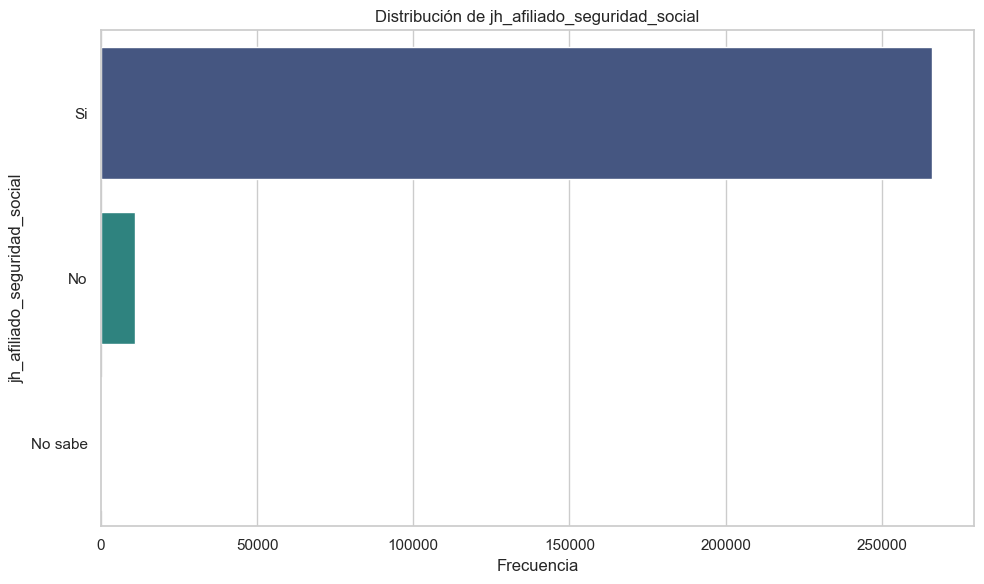

In [53]:
df_jefes_de_hogar['jh_afiliado_seguridad_social']= df_jefes_de_hogar['jh_afiliado_seguridad_social'].map({1: 'Si', 2: 'No', 9: 'No sabe'})
print(obtener_frecuencia_valores(df_jefes_de_hogar, 'jh_afiliado_seguridad_social'))
graficar_histograma(df_jefes_de_hogar, 'jh_afiliado_seguridad_social')

### Variable `jh_genero`

Corresponde al genero del jefe de hogar

 1. masculino, 
 2. femenino.

jh_genero
Masculino    142002
Femenino     135156
Name: count, dtype: int64


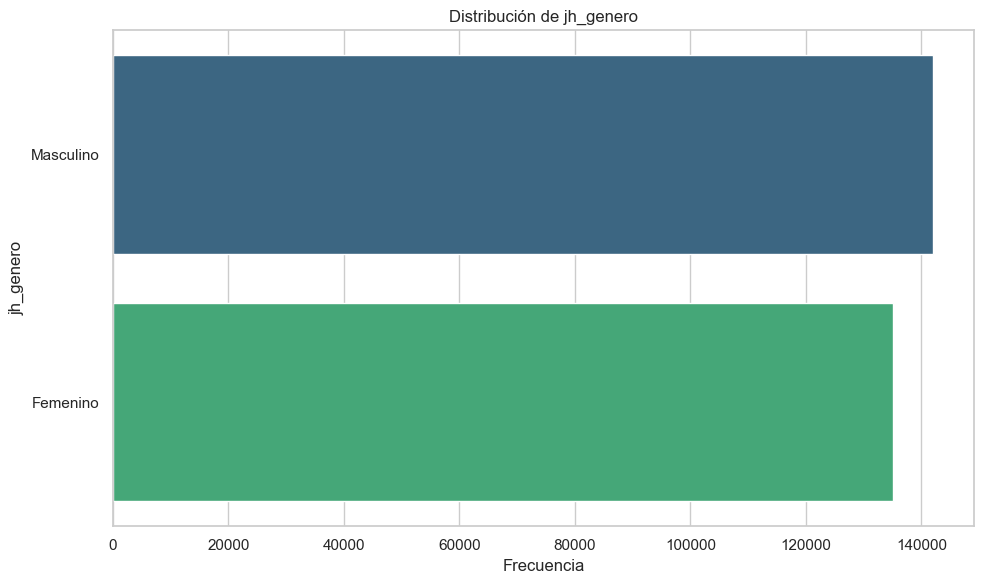

In [54]:
df_jefes_de_hogar['jh_genero'] = df_jefes_de_hogar['jh_genero'].map({1: 'Masculino', 2: 'Femenino'})
print(obtener_frecuencia_valores(df_jefes_de_hogar, 'jh_genero'))
graficar_histograma(df_jefes_de_hogar, 'jh_genero')

### Variable `jh_edad`

Edad del jefe de hogar.

jh_edad
40     5966
43     5947
42     5740
41     5687
38     5567
       ... 
104       3
103       3
107       2
105       1
108       1
Name: count, Length: 93, dtype: int64


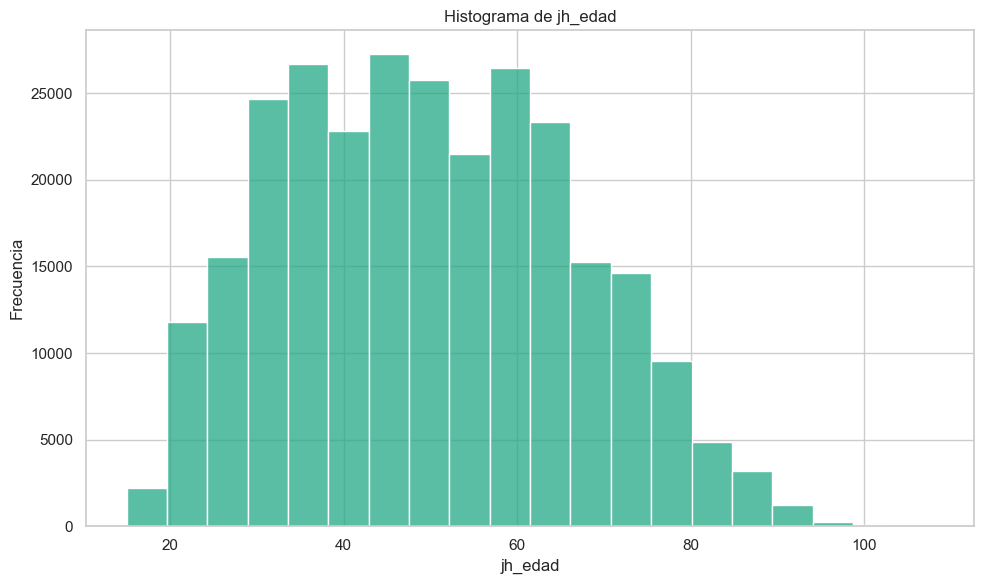

In [55]:
print(obtener_frecuencia_valores(df_jefes_de_hogar, 'jh_edad'))
graficar_histograma(df_jefes_de_hogar, 'jh_edad')

### Variable `nivel_educativo`

Mayor nivel educativo alcanzado por el jefe de hogar: 

1. Ninguno, 
2. Preescolar, 
3. Básica primaria (1o - 5o), 
4. Básica secundaria (6o - 9o), 
5. Media académica (Bachillerato clásico), 
6. Media técnica (Bachillerato técnico), 
7. Normalista, 
8. Técnica profesional, 
9. Tecnológica, 
10. Universitaria, 
11. Especialización, 
12. Maestría, 
13. Doctorado, 
99. No sabe, no informa.


jh_nivel_educativo
5.0     73591
3.0     71393
10.0    36772
4.0     32088
8.0     20735
1.0     13505
11.0     9524
9.0      8821
6.0      5334
12.0     4162
13.0      622
7.0       586
2.0        23
99.0        2
Name: count, dtype: int64


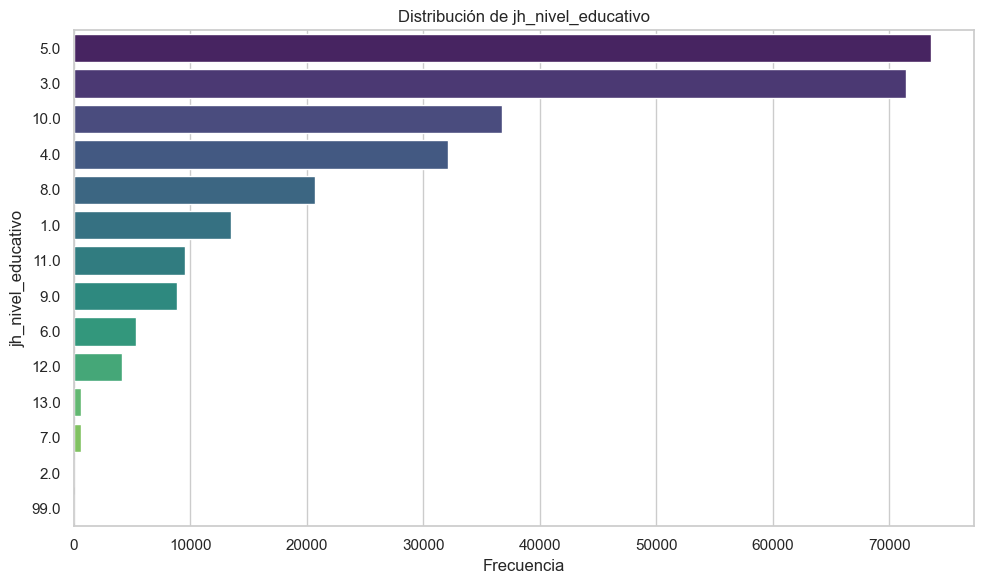

In [56]:
df_jefes_de_hogar['jh_nivel_educativo'] = df_jefes_de_hogar['jh_nivel_educativo'].map({
    1: 'Ninguno',
    2: 'Preescolar',
    3: 'Básica primaria (1o - 5o)',
    4: 'Básica secundaria (6o - 9o)',
    5: 'Media académica (Bachillerato clásico)',
    6: 'Media técnica (Bachillerato técnico)',
    7: 'Normalista',
    8: 'Técnica profesional',
    9: 'Tecnológica',
    10: 'Universitaria',
    11: 'Especializacion',
    12: 'Maestría',
    13: 'Doctorado',
    14: 'No sabe, no informa',
    99: 'No sabe, no informa'
})

print(obtener_frecuencia_valores(df_jefes_de_hogar, 'jh_nivel_educativo'))
graficar_histograma(df_jefes_de_hogar, 'jh_nivel_educativo')

In [ ]:
# Filtrar filas donde jh_nivel_educativo es nulo
nulos_jh_nivel_educativo = df_jefes_de_hogar[df_jefes_de_hogar['jh_nivel_educativo'].isnull()]

# Mostrar las filas con nulos
nulos_jh_nivel_educativo

### Variable `jh_situacion_laboral`

Indica la actividad económica realizada por el jefe de hogar: 

1. Trabajando, 
2. Buscando trabajo, 
3. Estudiando, 
4. Oficios del hogar,
5. Incapacitado permanente para trabajar, 
6. Otra actividad. 
9. No sabe, no responde

In [ ]:
df_jefes_de_hogar['jh_situacion_laboral'] = df_jefes_de_hogar['jh_situacion_laboral'].map({
    1: 'Trabajando',
    2: 'Buscando trabajo',
    3: 'Estudiando',
    4: 'Oficios del hogar',
    5: 'Incapacitado permanente para trabajar',
    6: 'Otra actividad',
    9: 'No sabe, no informa'
})

print(obtener_frecuencia_valores(df_jefes_de_hogar, 'jh_situacion_laboral'))
graficar_histograma(df_jefes_de_hogar, 'jh_situacion_laboral')

### Variable `jh_posicion_ocupacional`

Indica la posición ocupacional del jefe de hogar: 
1. Obrero o empleado de empresa particular, 
2. Obrero o empleado del gobierno, 
3. Empleado doméstico, 
4. Trabajador por cuenta propia, 
5. Patrón o empleador, 
6. Trabajador familiar sin remuneración, 
7. Trabajador sin remuneración en empresas o negocios de otros hogares, 
8. Jornalero o Peón, 
9. No sabe, no informa

In [ ]:
df_jefes_de_hogar['jh_posicion_ocupacional'] = df_jefes_de_hogar['jh_posicion_ocupacional'].map({
    1: 'Obrero o empleado de empresa particular',
    2: 'Obrero o empleado del gobierno',
    3: 'Empleado doméstico',
    4: 'Trabajador por cuenta propia',
    5: 'Patrón o empleador',
    6: 'Trabajador familiar sin remuneración',
    7: 'Trabajador sin remuneración en empresas o negocios de otros hogares',
    8: 'Jornalero o Peón',
    9: 'No sabe, no informa'
})
print(obtener_frecuencia_valores(df_jefes_de_hogar, 'jh_posicion_ocupacional'))
graficar_histograma(df_jefes_de_hogar, 'jh_posicion_ocupacional')

### Variable `jh_horas_trabajo_semanales`

Número de horas que trabaja el jefe de hogar a la semana.

In [ ]:
def categorizar_horas_de_trabajo(row):
    if row == 999:
        return 'No sabe, no informa'
    elif 0 <= row < 20:
        return 'Menos de 20 horas'
    elif 20 <= row <= 40:
        return '20 a 40 horas'
    elif row > 40:
        return 'Más de 40 horas'
    else:
        return None  # Para manejar posibles valores fuera de rango

# Aplicar la función a la columna
df_jefes_de_hogar['jh_horas_trabajo_semanales'] = df_jefes_de_hogar['jh_horas_trabajo_semanales'].apply(categorizar_horas_de_trabajo)

print(obtener_frecuencia_valores(df_jefes_de_hogar, 'jh_horas_trabajo_semanales'))
graficar_histograma(df_jefes_de_hogar, 'jh_horas_trabajo_semanales')

### Variable `jh_cotizacion_pension`

Indica si el jefe de hogar está cotizando actualmente a un fondo de pensiones

1. Sí 
2. No 
3. Ya es pensionado. 
9. No sabe, no informa

In [ ]:
df_jefes_de_hogar['jh_cotizacion_pension'] = df_jefes_de_hogar['jh_cotizacion_pension'].map({
    1: 'Si',
    2: 'No',
    3: 'Ya es pensionado',
    9: 'No sabe, no informa'
})
print(obtener_frecuencia_valores(df_jefes_de_hogar, 'jh_cotizacion_pension'))
graficar_histograma(df_jefes_de_hogar, 'jh_cotizacion_pension')

### Cálculo de dependientes

Saber cuántos dependientes (niños, ancianos, o adultos sin empleo), tiene el jefe de hogar es crucial para evaluar la carga económica del hogar. Esto puede ayudar a diseñar programas de apoyo para familias con múltiples dependientes.

* Chequeo del Jefe de Hogar: La primera línea dentro de la función es_dependiente verifica si p6050 es igual a 1. Si es así, la función retorna False, indicando que el jefe de hogar no es un dependiente.
* Determinación de Dependientes: Si el individuo no es el jefe de hogar (p6050 ≠ 1), se aplica la lógica para determinar si es un niño, anciano, o una persona en edad de trabajar que no trabaja.
* Cálculo de Dependientes: Se cuentan los dependientes por hogar y se indica si el hogar tiene al menos un dependiente.

Este enfoque asegura que solo las personas que no son jefes de hogar sean evaluadas como dependientes y permite un análisis más preciso de la estructura familiar para el diseño de intervenciones.

In [ ]:
# Definir una función para identificar dependientes
def es_dependiente(row):
    # Verificar si la persona es el jefe de hogar
    if row['p6050'] == 1:
        return False
    
    # Definir las edades para niños y ancianos
    edad_ninio = 18
    edad_anciano = 65
    
    # Determinar si el individuo es un niño o anciano
    es_ninio = row['p6040'] < edad_ninio
    es_anciano = row['p6040'] >= edad_anciano
    
    # Un miembro es dependiente si:
    return es_ninio or es_anciano or (row['pet'] == 1 and row['p6240'] != 1)

# Aplicar la función para identificar dependientes en df_personas
df_personas['es_dependiente'] = df_personas.apply(es_dependiente, axis=1)

# Contar el número de dependientes por hogar (sin contar al jefe de hogar)
dependientes_por_hogar = df_personas[df_personas['p6050'] != 1].groupby(['directorio', 'secuencia_p'])['es_dependiente'].sum().reset_index()

# Renombrar la columna para el total de dependientes
dependientes_por_hogar.rename(columns={'es_dependiente': 'total_dependientes'}, inplace=True)

# Unir el total de dependientes con el dataframe de jefes de hogar
df_jefes_de_hogar = df_jefes_de_hogar.merge(dependientes_por_hogar, on=['directorio', 'secuencia_p'], how='left')

# Llenar los NaN con 0 para hogares sin dependientes
df_jefes_de_hogar['total_dependientes'].fillna(0, inplace=True)

# Mostrar el DataFrame con la nueva columna
print(df_jefes_de_hogar[['directorio', 'secuencia_p', 'total_dependientes']].head())

### Generación del dataframe de analisis 

Este código une ambos dataframes en función de las columnas `directorio` y `secuencia_p`, agregando las columnas de `df_jefes_de_hogar` a `df_consolidado_hogar_personas`. Si alguna de las claves no está presente en `df_jefes_de_hogar`, se llenará con NaN debido al how='left'.

In [76]:
# Combinar df_consolidado_hogar_personas y df_jefes_de_hogar en df_pobreza_desigualdad
df_pobreza_desigualdad = df_pobreza_desigualdad.merge(
    df_consolidado_hogar_personas,
    left_on=['id_hogar', 'id_sec'],
    right_on=['directorio', 'secuencia_p'],
    how='left'
)

df_pobreza_desigualdad = df_pobreza_desigualdad.merge(
    df_jefes_de_hogar,
    left_on=['id_hogar', 'id_sec'],
    right_on=['directorio', 'secuencia_p'],
    how='left',
    suffixes=('', '_jefe')  # Agrega un sufijo a las columnas del segundo DataFrame
)


In [90]:
# Eliminar las columnas directorio y secuencia_p de los dataframes mergeados.
df_pobreza_desigualdad = df_pobreza_desigualdad.drop(columns=['directorio', 'secuencia_p','directorio_jefe','directorio_jefe','secuencia_p_jefe'])

In [ ]:
# Eliminar las columnas id_hogar e id_sec
df_pobreza_desigualdad = df_pobreza_desigualdad.drop(columns=['id_hogar', 'id_sec'])

# Reiniciar el índice y crear un índice numérico consecutivo
df_pobreza_desigualdad.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame resultante
df_pobreza_desigualdad.head()

In [ ]:
# Crear la columna ingreso_per_capita
df_pobreza_desigualdad['ingreso_per_capita'] = df_pobreza_desigualdad['total_ingresos_hogar'] / df_pobreza_desigualdad['total_personas_hogar']

# Mostrar el DataFrame resultante
df_pobreza_desigualdad.head()

In [ ]:
print('dimensiones dataframe:', df_pobreza_desigualdad.shape)
print('Información: ')
print('-'*30)
print(df_pobreza_desigualdad.info())
df_pobreza_desigualdad.head()

In [86]:
# Exportar el DataFrame a CSV
df_pobreza_desigualdad.to_csv('../data/clean/pobreza_desigualdad.csv', index=False)